In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from multiprocessing import Pool
import inspect
import pickle

from evolver import Evolver
from models import Model3, Model1_2, Model2, Model1_1
from util_funs import find_initial_params, plot_chains, print_latex_result, read_files,\
    filter_data, filter_file_names, get_run_id, emcee_analysis

np.random.seed(12345)

%load_ext autoreload
%autoreload 2

# True if you want to read from the dataset files, False if you want to generate the date with the model
USE_DATASET = True

Best time range is [0, 2]


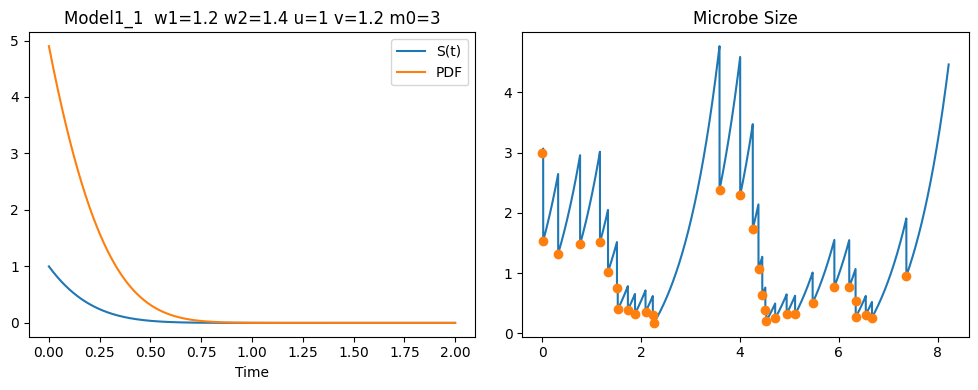

In [13]:
if not USE_DATASET:
    # m0, w1, w2, u, v = 3, 2, 3, 0.8, 2
    # model = Model2(m0=m0, w1=w1, w2=w2, u=u, v=v)


    m0, w1, w2, u, v = 3, 1.2, 1.4, 1, 1.2
    model = Model1_1(m0=m0, w1=w1, w2=w2, u=u, v=v)

    # Here we define our model
    # a, b, c, d, w2, u, v = 4, 0.3, 3, 10, 0.8, 2, 3
    # m_f_i = 5
    # model = Model3(a=a, b=b, c=c, d=d, m_f=m_f_i, w2=w2, u=u, v=v)

    # Plot the model
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    model.get_figure(axs[0])


    # Here we make the model evolve (and divide)
    n_generations = 400
    evolver = Evolver(model=model)
    evolver.evolve(n_generations, debug=False)

    # Here we show some of the result
    end_gen = 30
    time, data = evolver.get_data(0, end_gen)
    final_time, final_data = evolver.get_start_data(0, end_gen)

    ptime = evolver.time[evolver.offset_start[0] : evolver.offset_end[end_gen] + 1]
    params = evolver.params[evolver.offset_start[0] : evolver.offset_end[end_gen] + 1]

    axs[1].plot(time, data[:, 0])
    axs[1].set_title('Microbe Size')
    axs[1].plot(final_time, final_data[:, 0], marker = 'o', linestyle = '');

100%|███████████████████████████████████████| 2000/2000 [00:49<00:00, 40.07it/s]


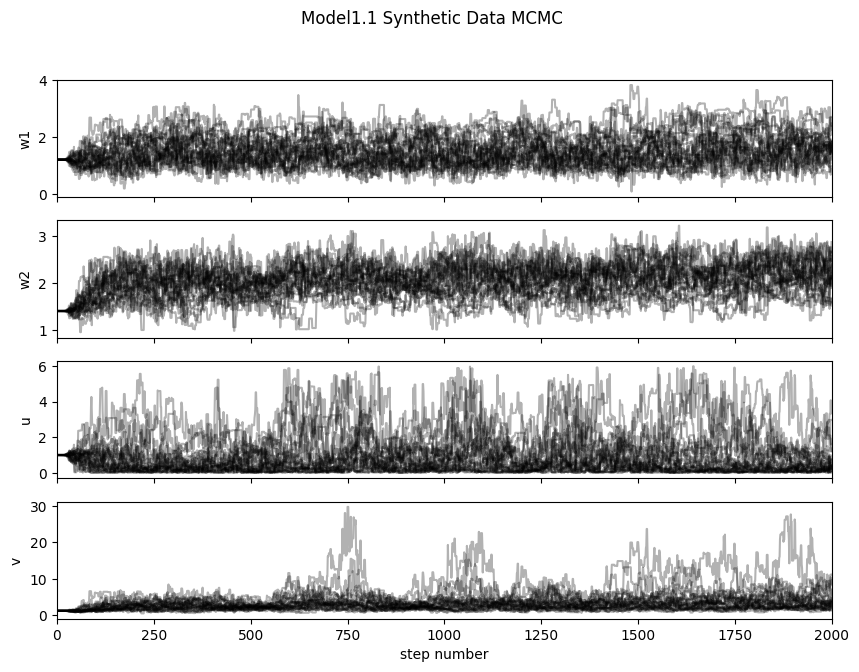

The chain is too short to get the auto correlation time
Flat samples shape:  (1050, 4)


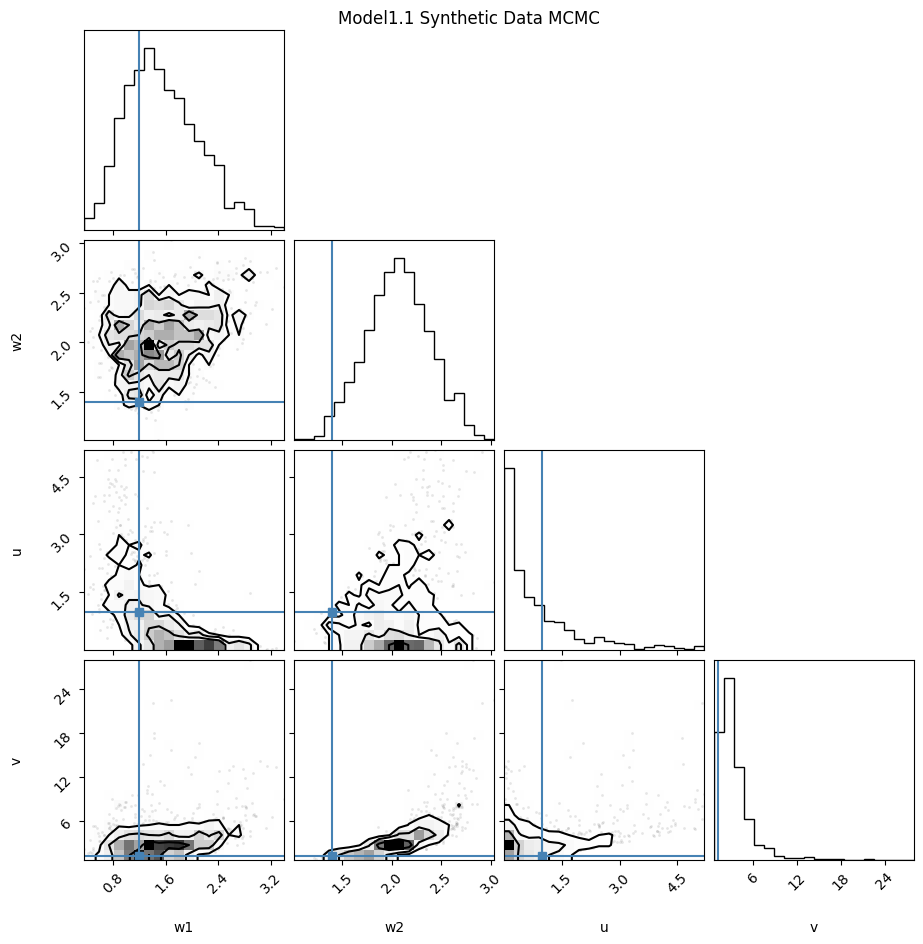

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# Here we use the data generated from our model to estimate the parameters 

if not USE_DATASET:
    truth = evolver.model.fix_params.copy() # our parameters defined above
    labels =  evolver.model.fix_params_label.copy()

    nwalkers = 25 # number of walkers for the MCMC
    # We add some gaussian noise to our initial parameters
    guess = np.array(truth) + 1e-5 * np.random.randn(nwalkers, len(truth)) 

    spans = evolver.spans
    params_list = []
    for i in range(evolver.params.shape[1]): # the order is defined in the __init__ method of the model
        params_list.append(evolver.params[:, i][:-1])


    chain_lenght = 2000
    discard = 500
    thin_number = 35
    title="Model1.1 Synthetic Data MCMC"
    emcee_analysis(nwalkers=nwalkers, truths=truth, log_prob_fn=evolver.model.log_prob, args=(spans, *params_list),
                   guess = guess, chain_lenght=chain_lenght, labels=labels, use_pool=True, discard=discard,
                   thinning=thin_number, plot=True, title=title)


Eliminated 1039 rows
######## ANALYZING DATASET susman18, RUN_ID: 194002 ########
Initial Parameters:
w1=1.200 w2=1.400 u=1.000 v=1.200

DATASET susman18, LINEAGE: 1.0, n data: 252


100%|███████████████████████████████████████| 3000/3000 [00:49<00:00, 60.95it/s]


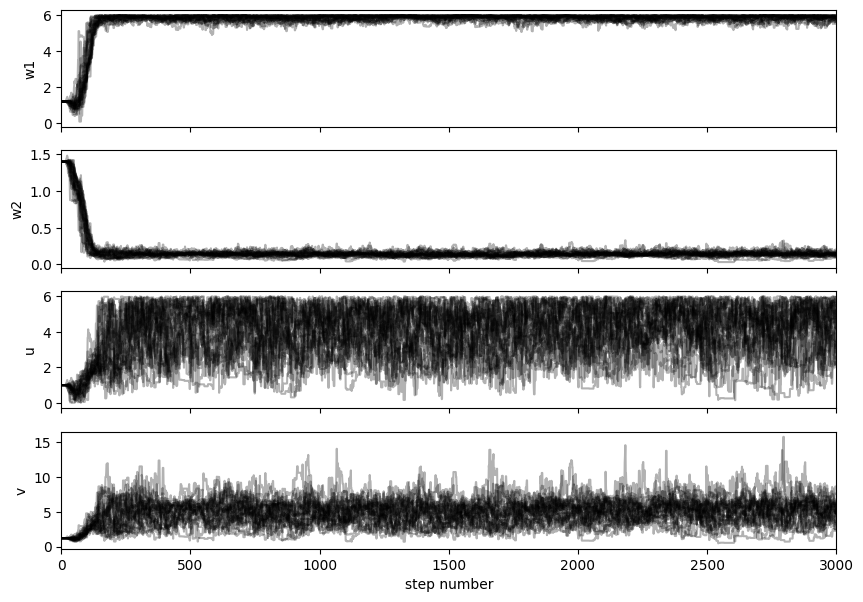

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


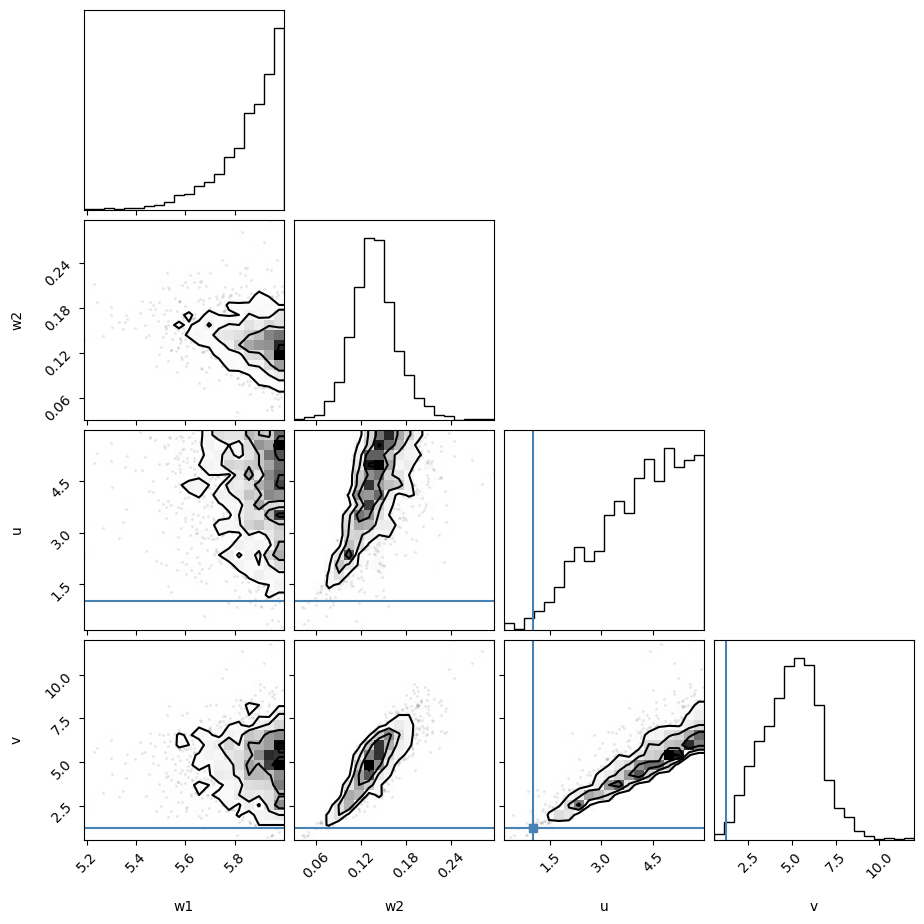

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_001.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 3.0, n data: 247


100%|███████████████████████████████████████| 3000/3000 [00:50<00:00, 59.42it/s]


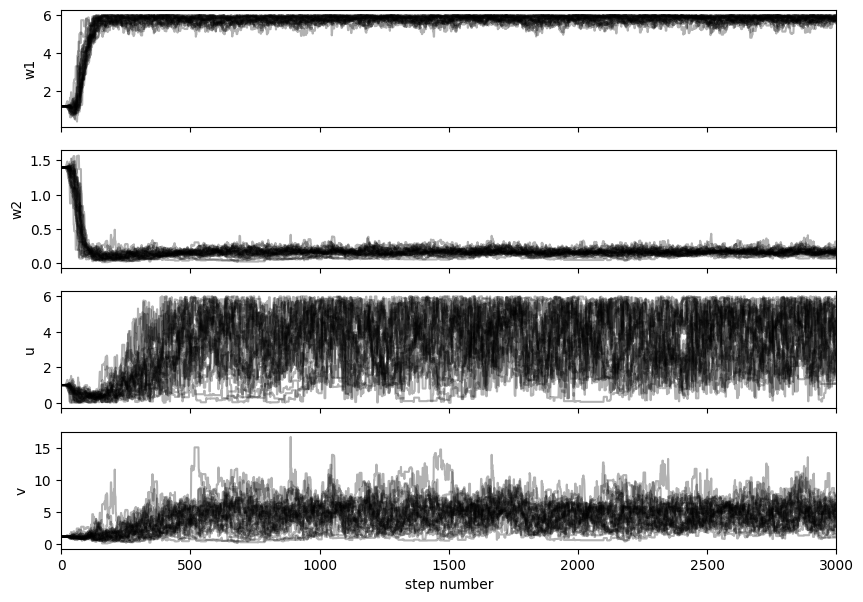

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


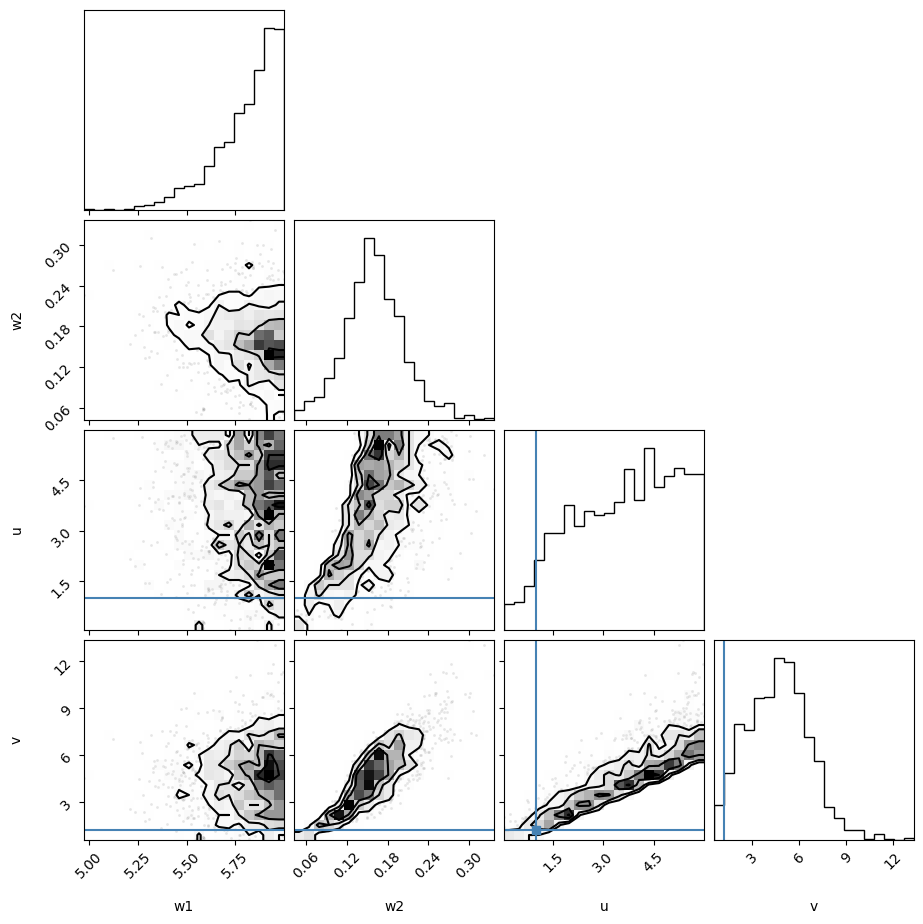

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_003.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 4.0, n data: 261


100%|███████████████████████████████████████| 3000/3000 [00:52<00:00, 57.06it/s]


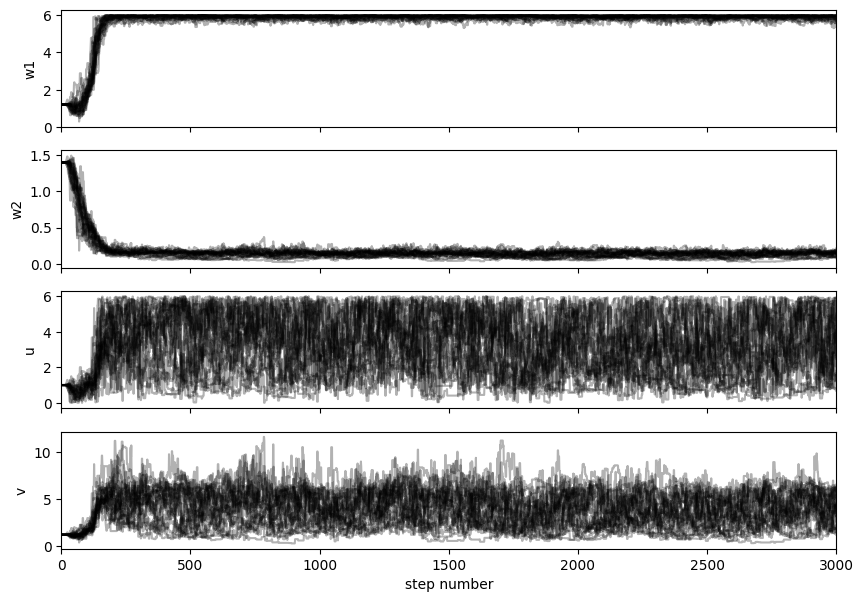

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


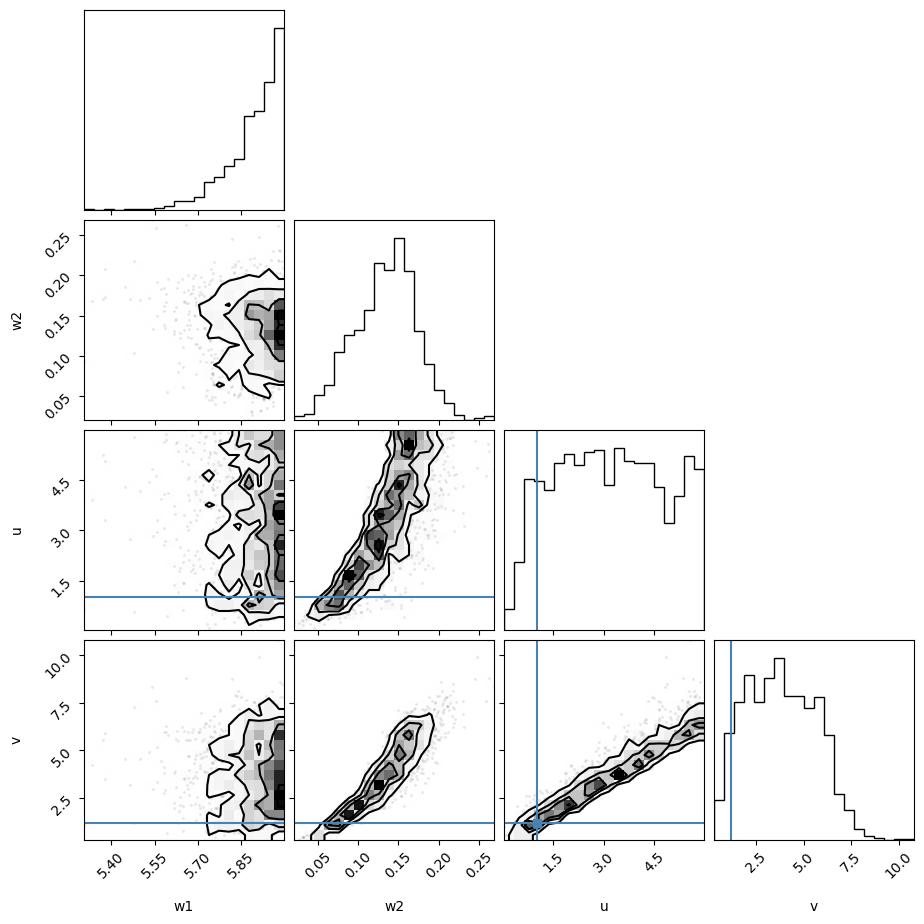

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_004.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 5.0, n data: 169


100%|███████████████████████████████████████| 3000/3000 [00:46<00:00, 63.96it/s]


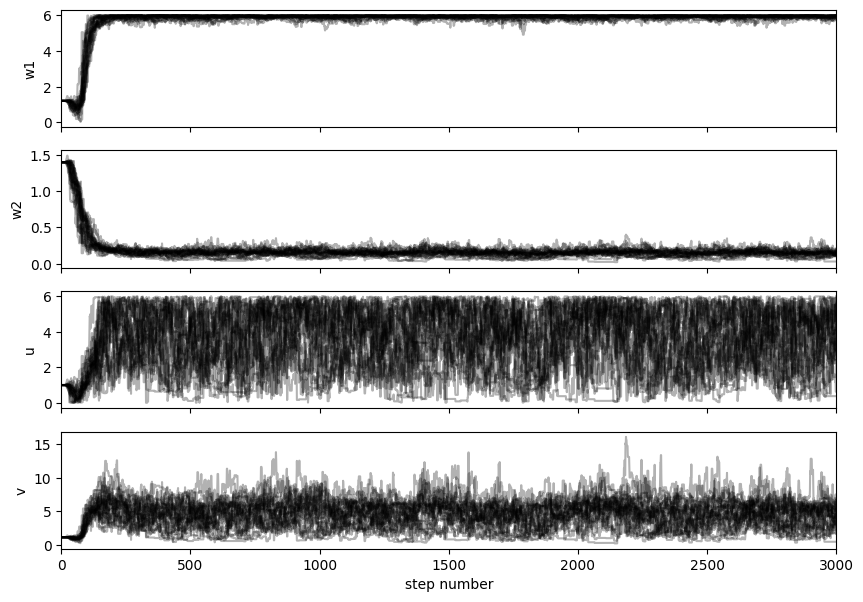

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


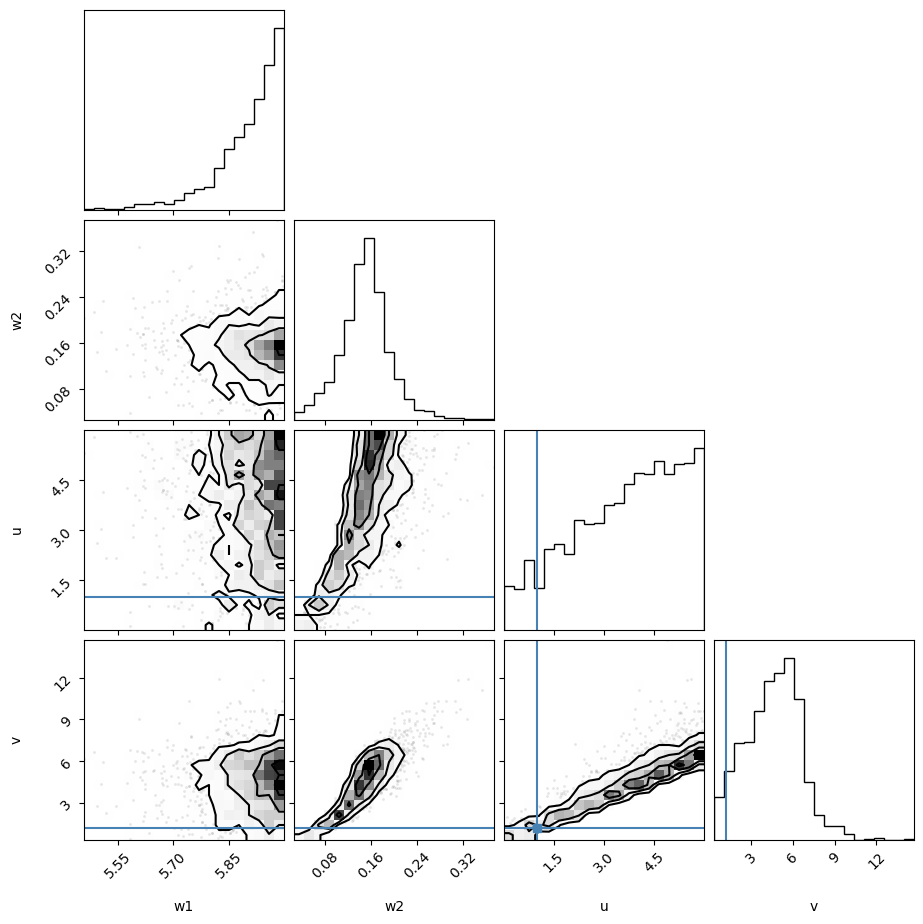

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_005.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 6.0, n data: 191


100%|███████████████████████████████████████| 3000/3000 [00:52<00:00, 57.16it/s]


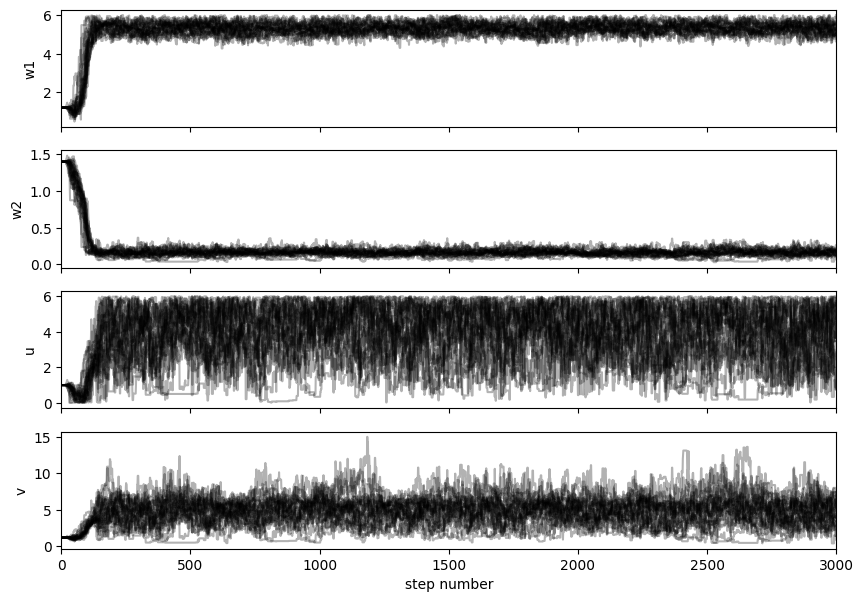

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


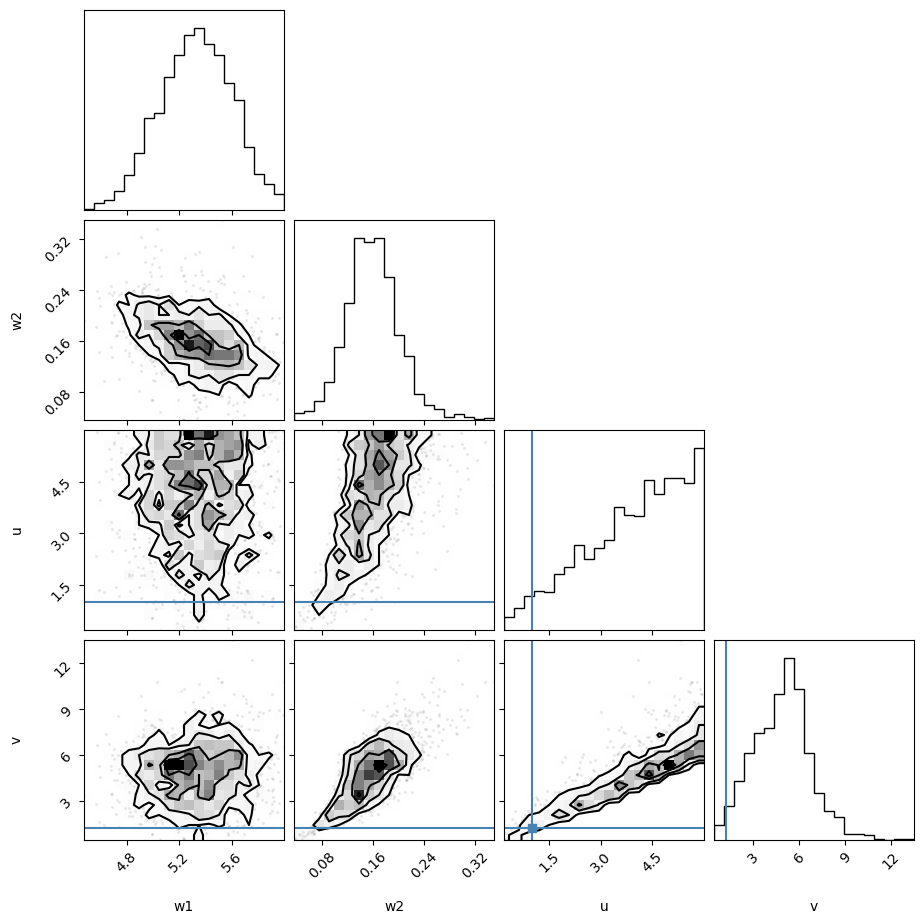

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_006.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 7.0, n data: 233


100%|███████████████████████████████████████| 3000/3000 [00:58<00:00, 51.20it/s]


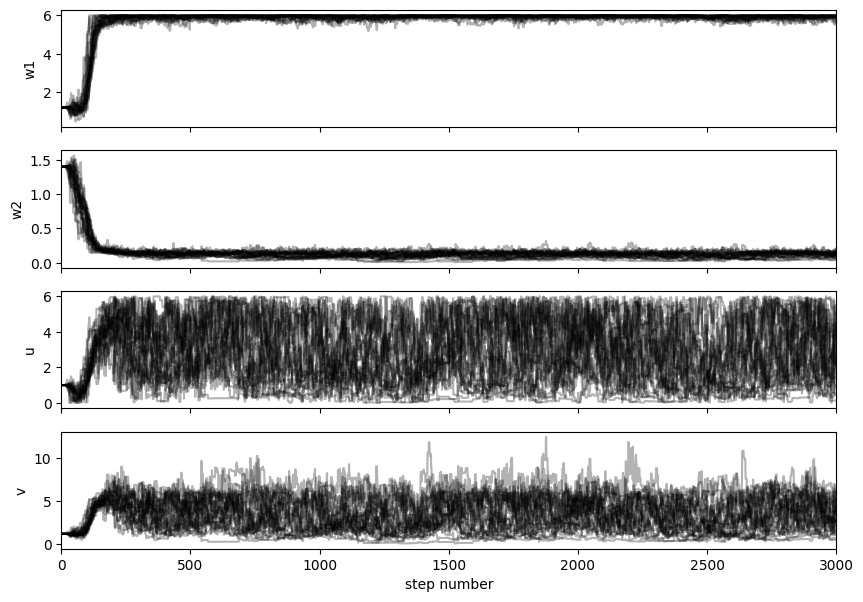

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


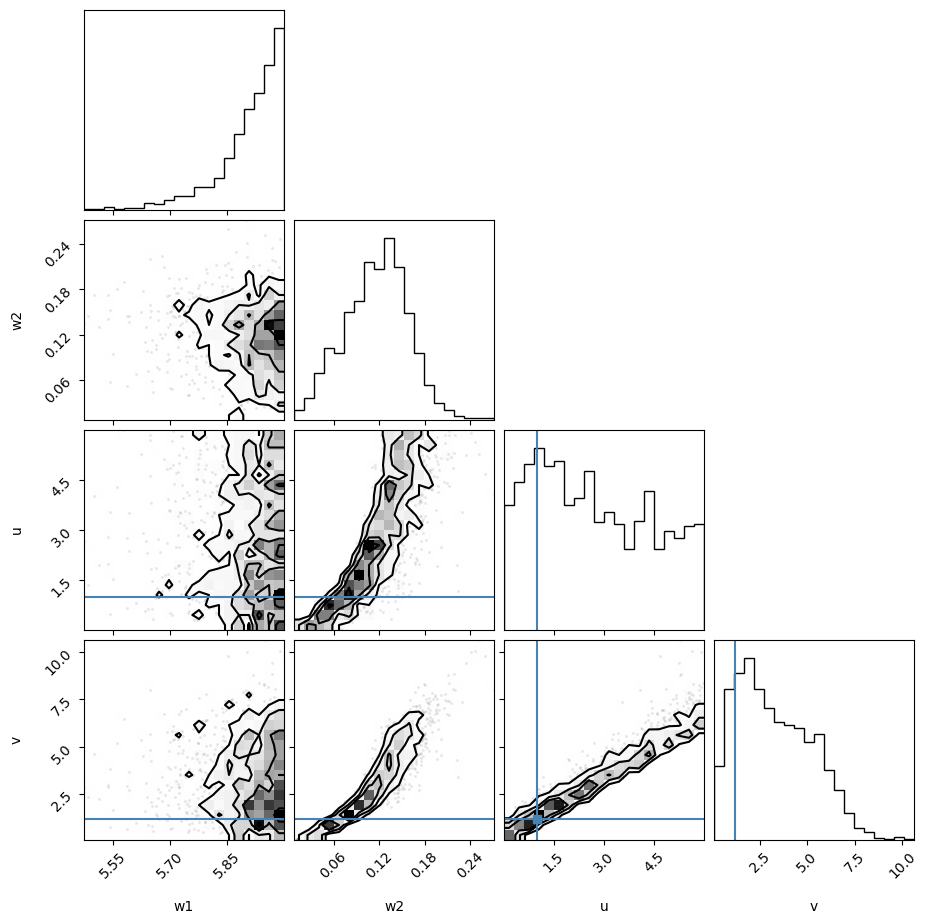

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_007.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 8.0, n data: 252


100%|███████████████████████████████████████| 3000/3000 [01:07<00:00, 44.35it/s]


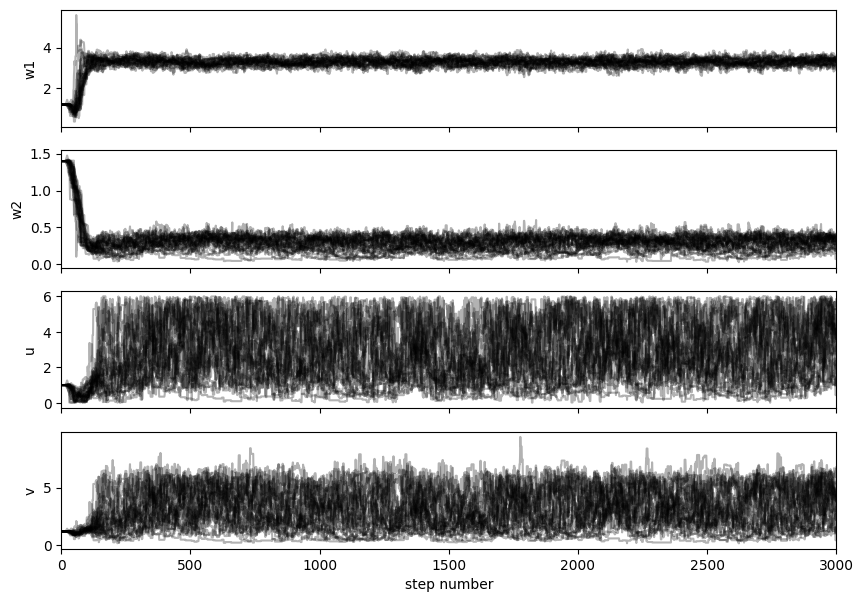

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


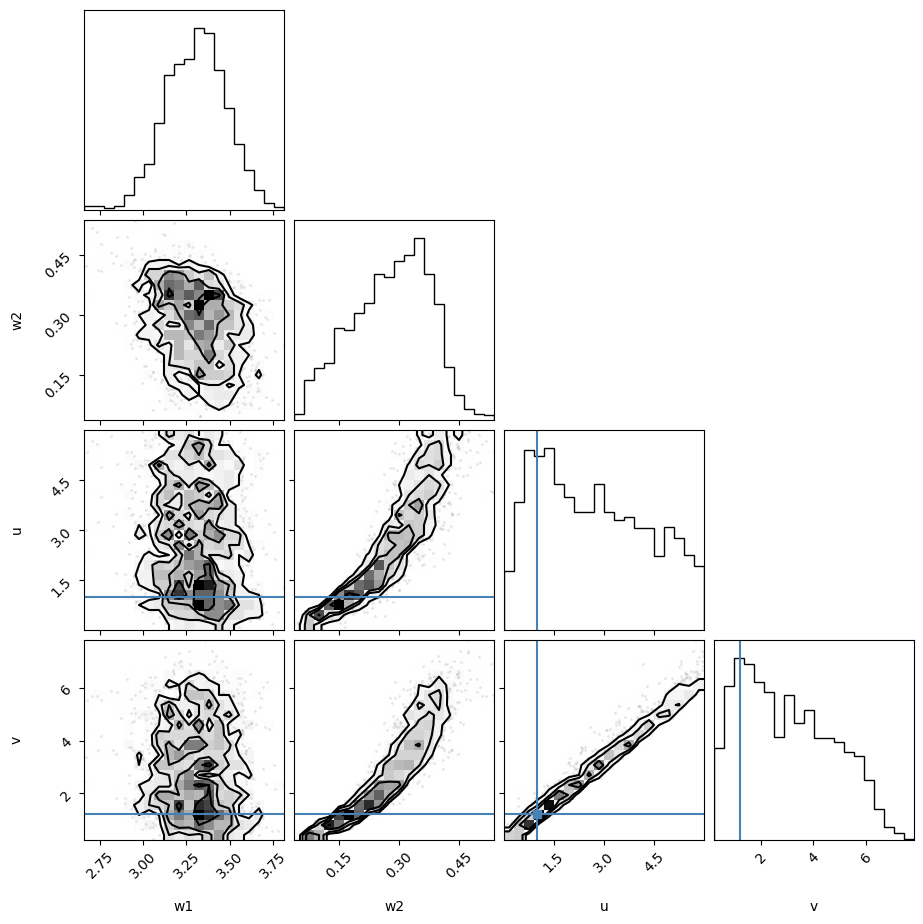

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_008.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 10.0, n data: 228


100%|███████████████████████████████████████| 3000/3000 [01:03<00:00, 47.01it/s]


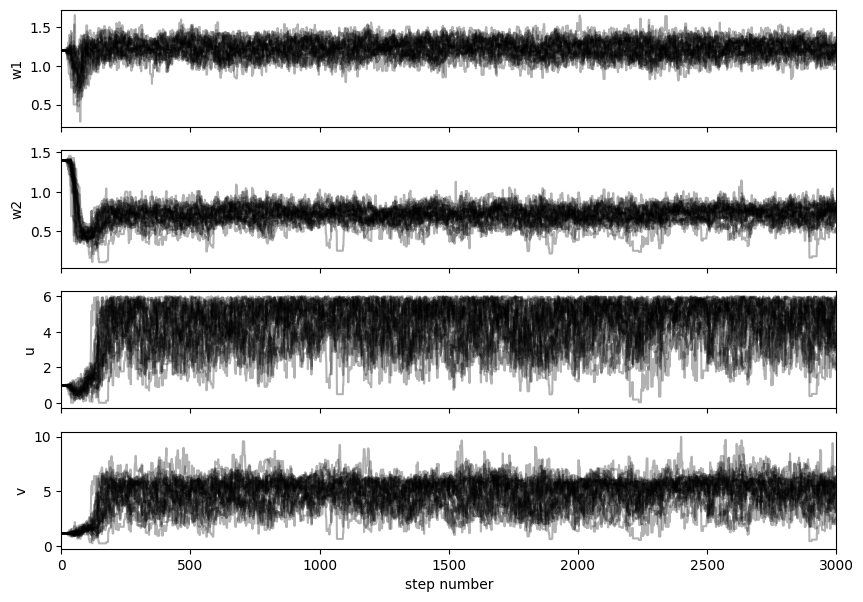

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


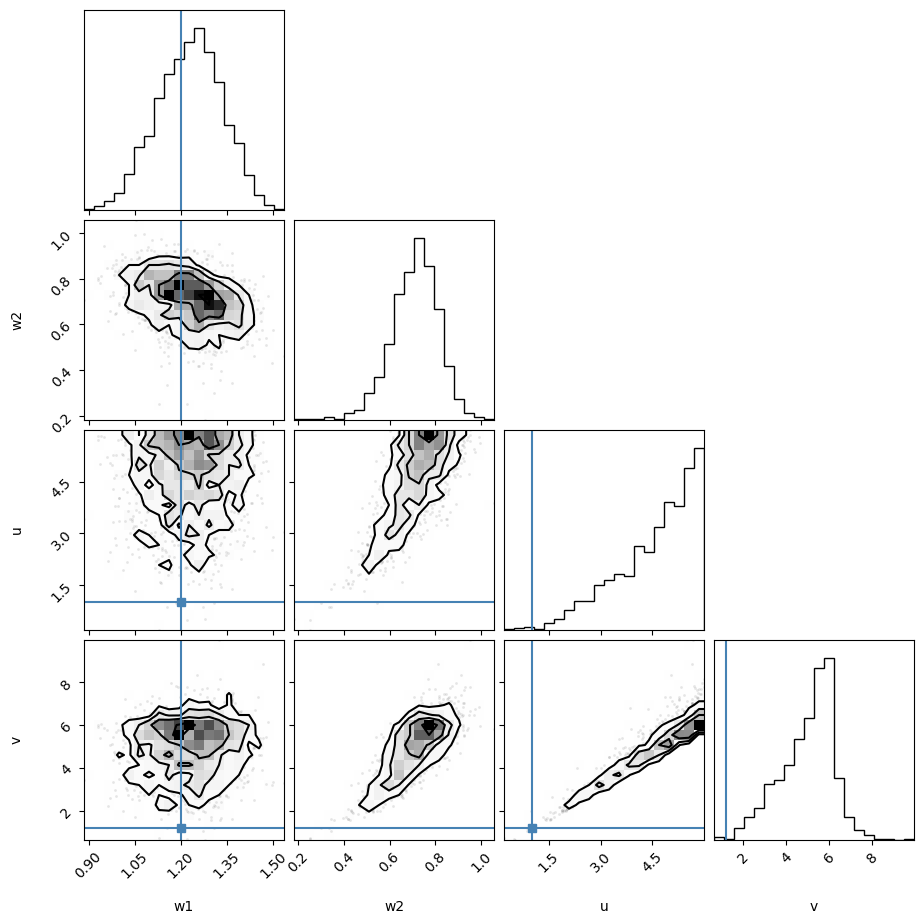

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_010.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 11.0, n data: 244


100%|███████████████████████████████████████| 3000/3000 [01:01<00:00, 48.49it/s]


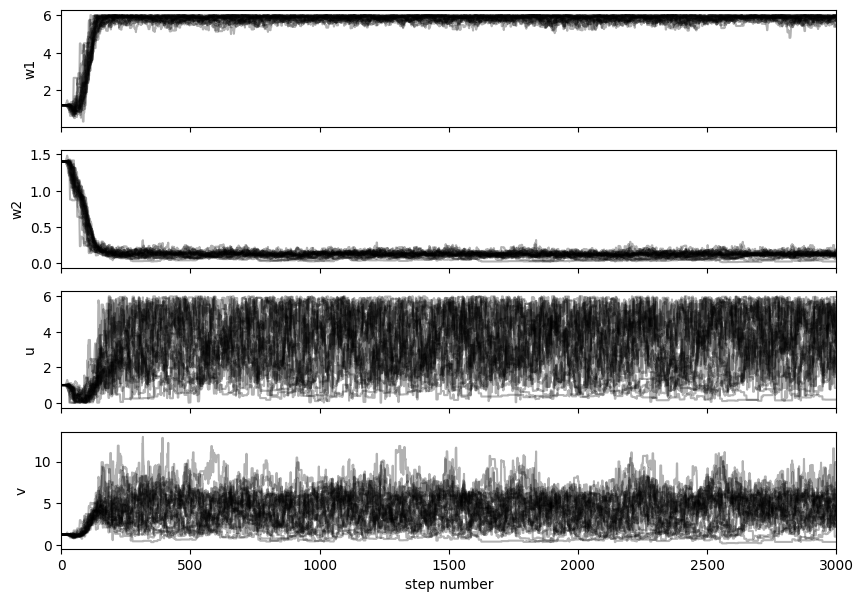

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


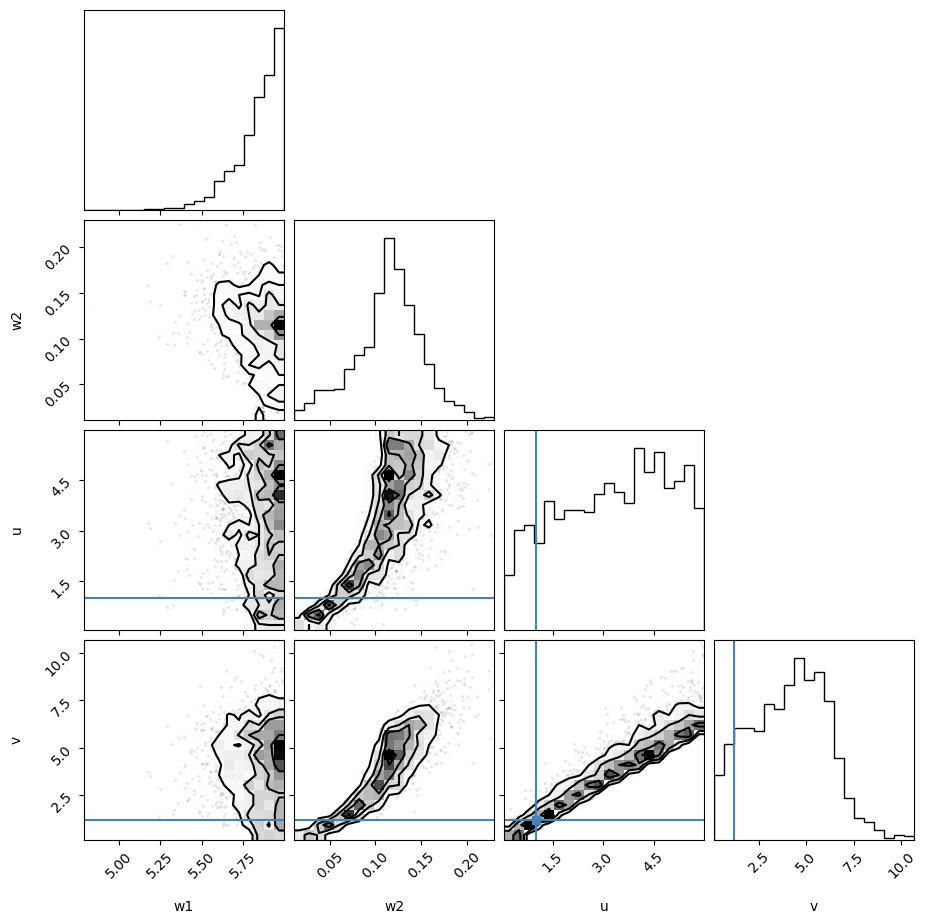

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_011.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 13.0, n data: 203


100%|███████████████████████████████████████| 3000/3000 [00:56<00:00, 52.83it/s]


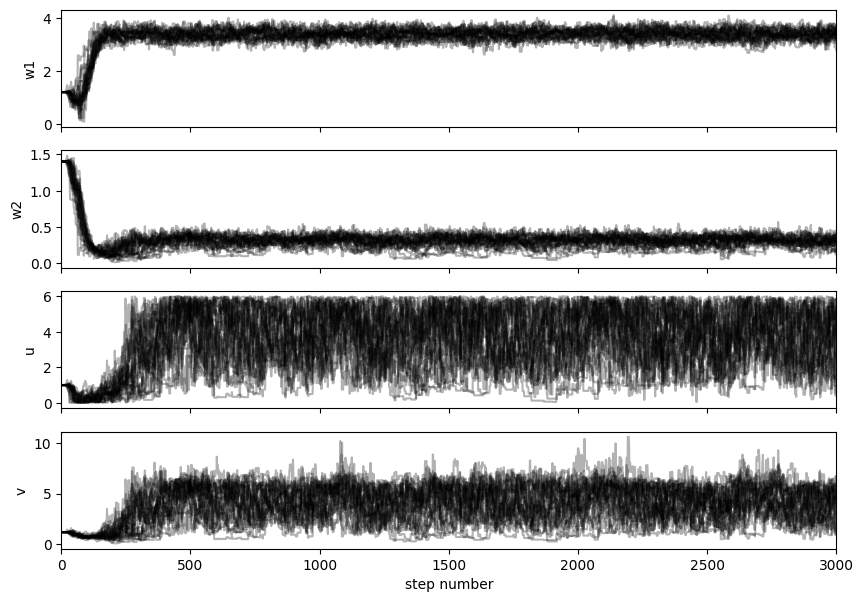

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


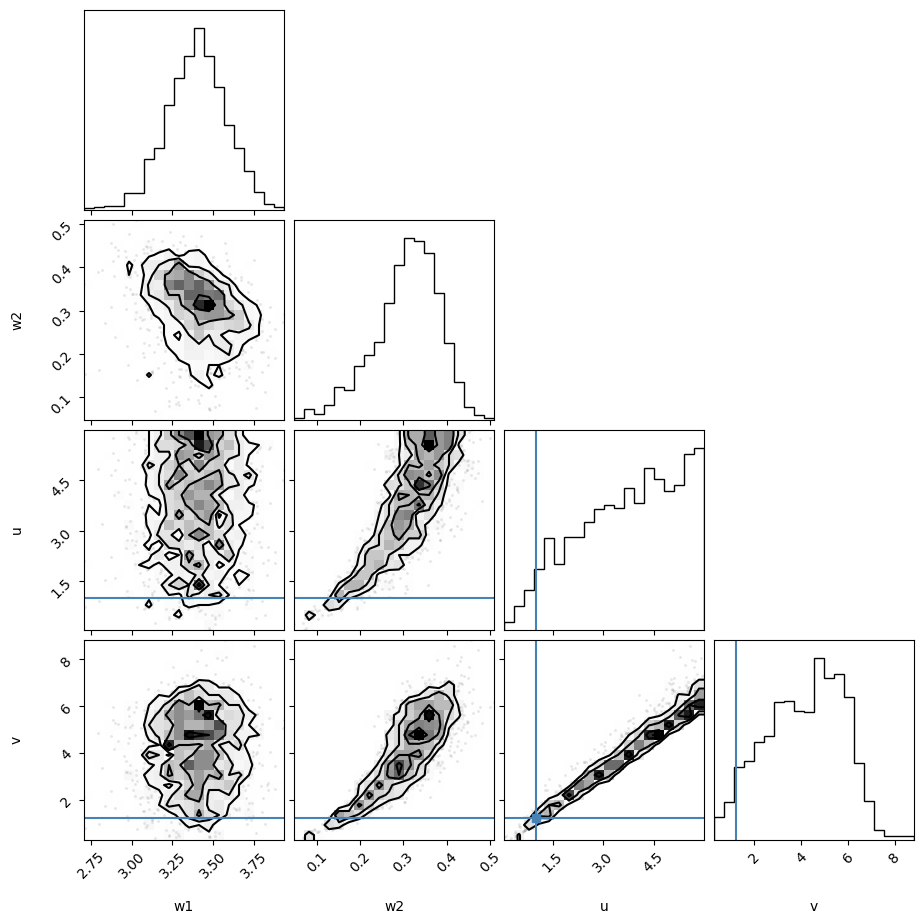

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_013.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 16.0, n data: 212


100%|███████████████████████████████████████| 3000/3000 [01:00<00:00, 49.82it/s]


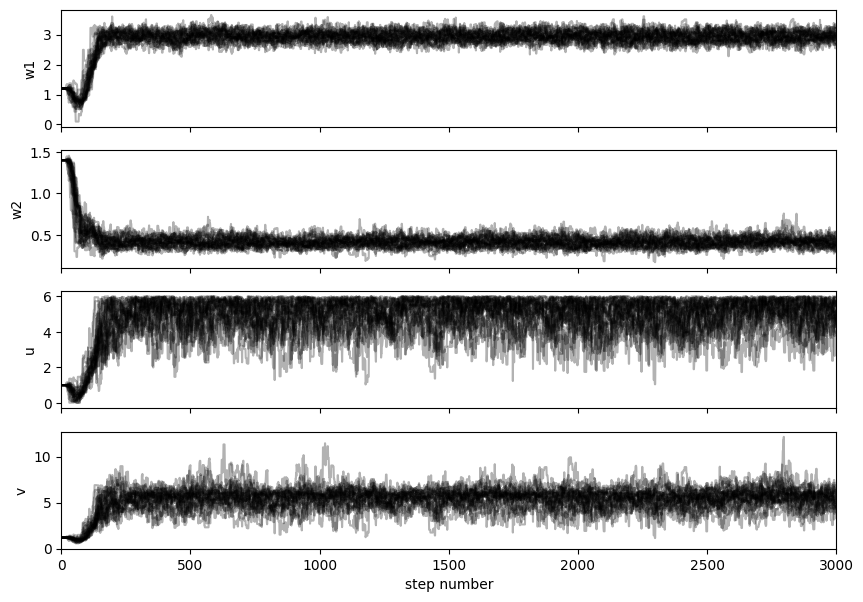

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


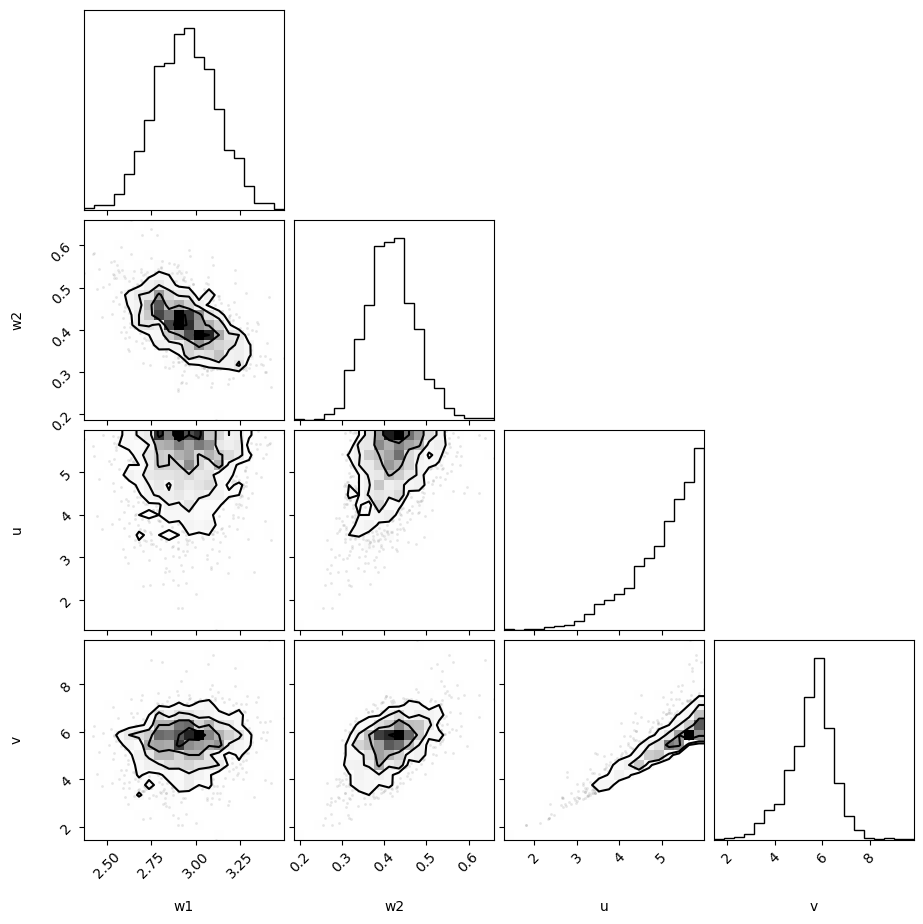

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_016.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 17.0, n data: 250


100%|███████████████████████████████████████| 3000/3000 [01:06<00:00, 45.26it/s]


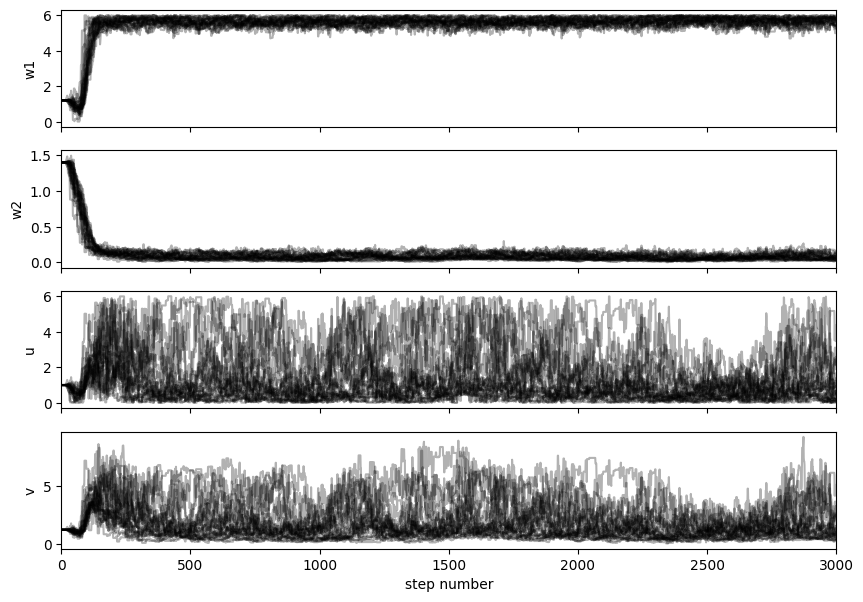

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


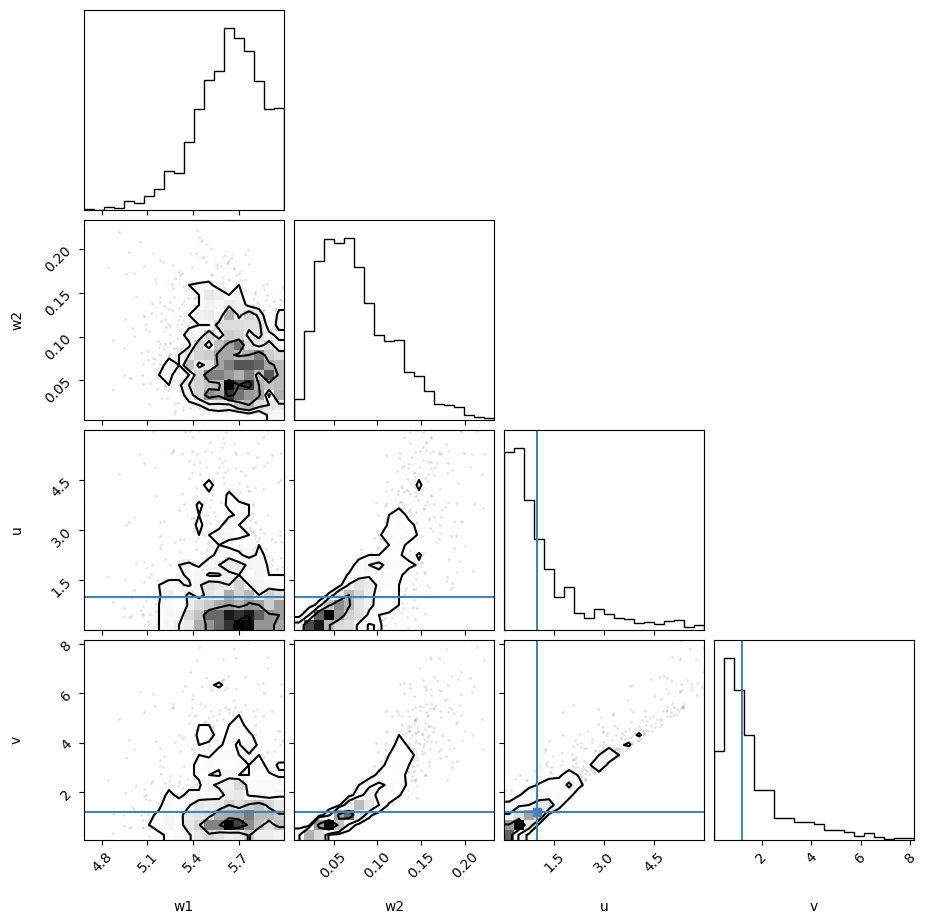

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_017.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 18.0, n data: 124


100%|███████████████████████████████████████| 3000/3000 [00:39<00:00, 76.63it/s]


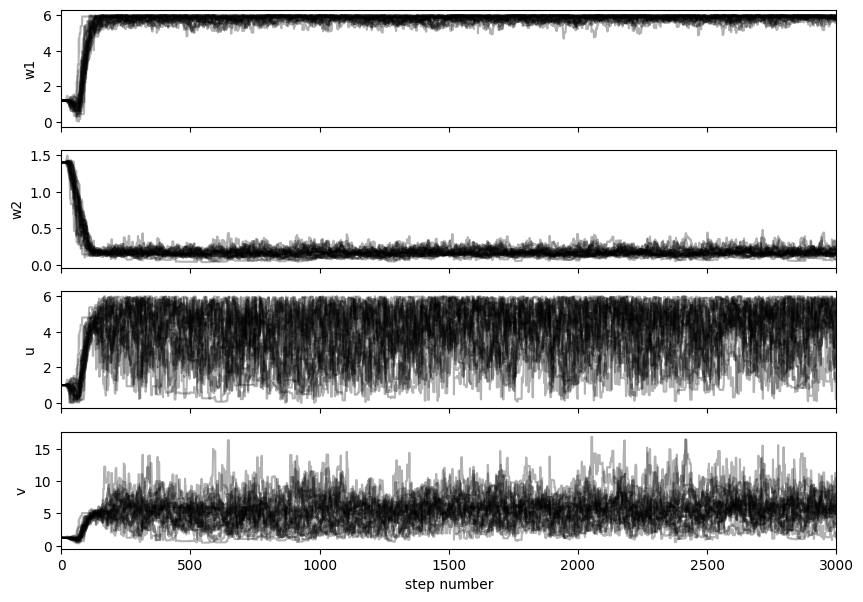

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


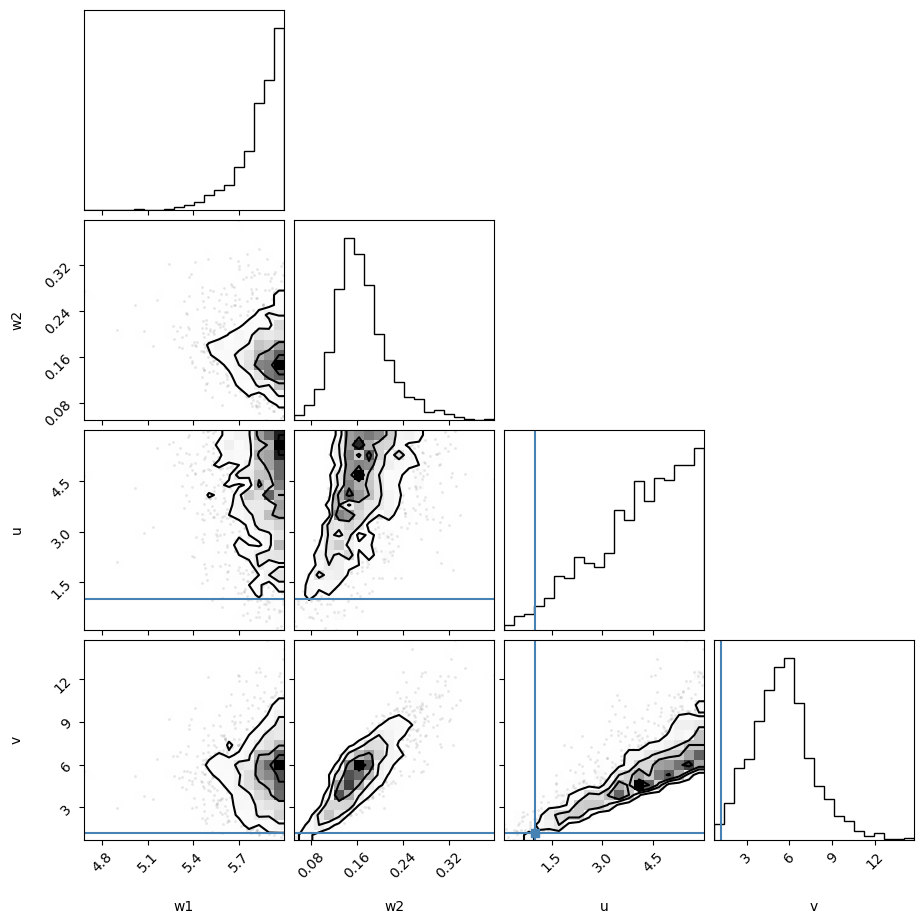

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_018.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 19.0, n data: 233


100%|███████████████████████████████████████| 3000/3000 [00:58<00:00, 51.41it/s]


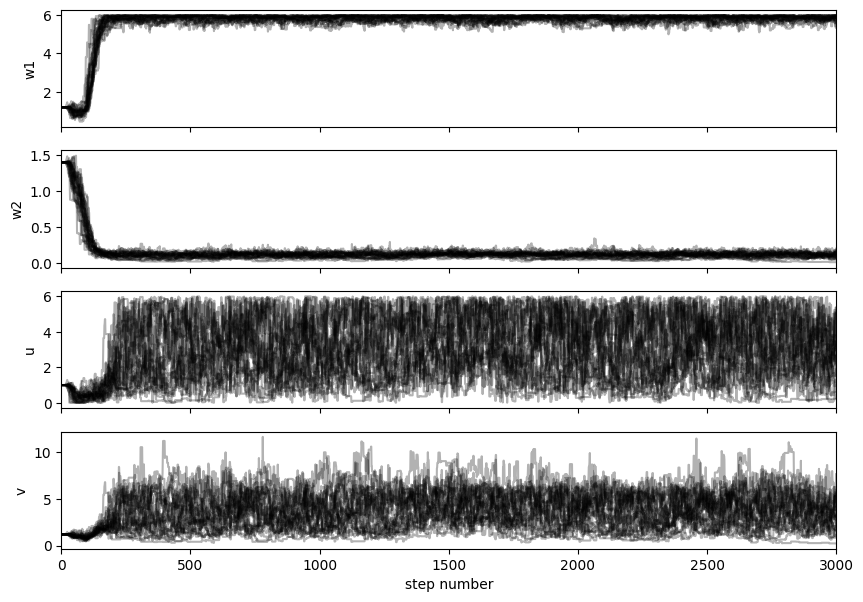

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


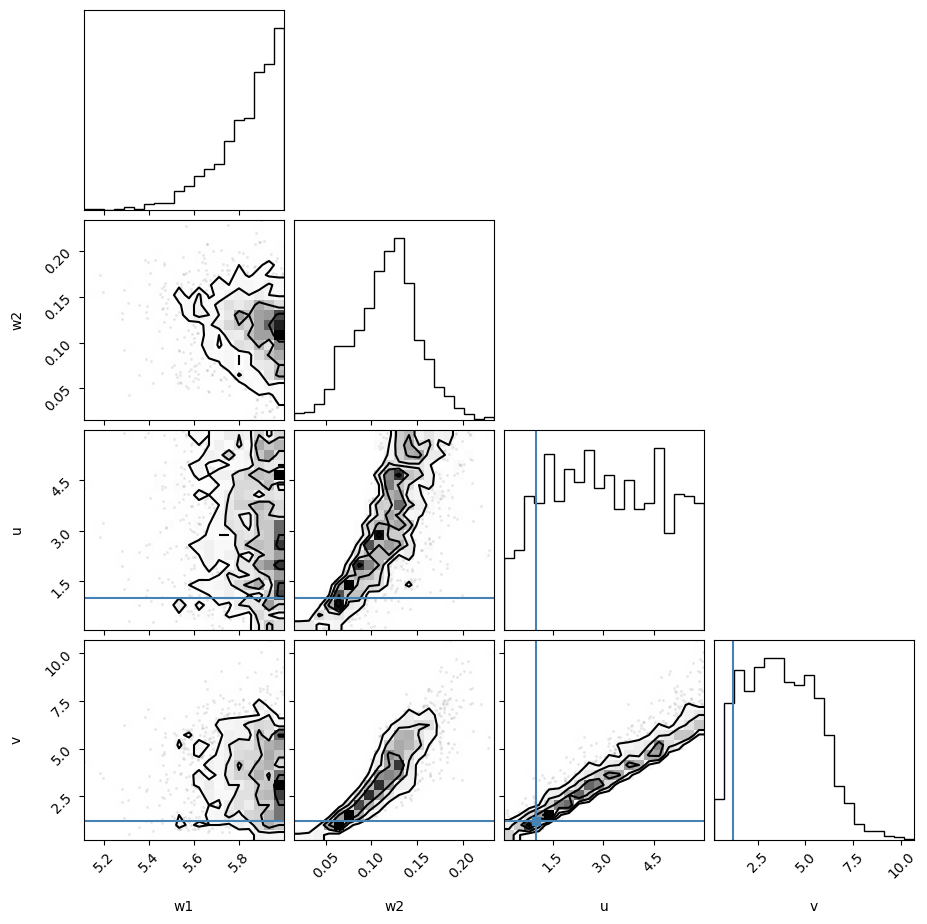

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_019.bin
----------------------------------------------------------
DATASET susman18, LINEAGE: 20.0, n data: 64


100%|██████████████████████████████████████| 3000/3000 [00:27<00:00, 110.11it/s]


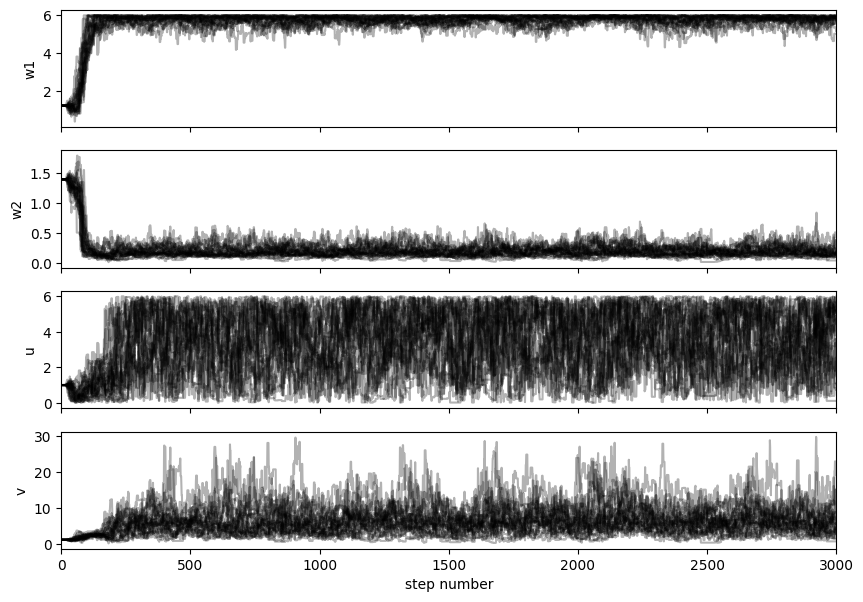

The chain is too short to get the auto correlation time
Flat samples shape:  (1425, 4)


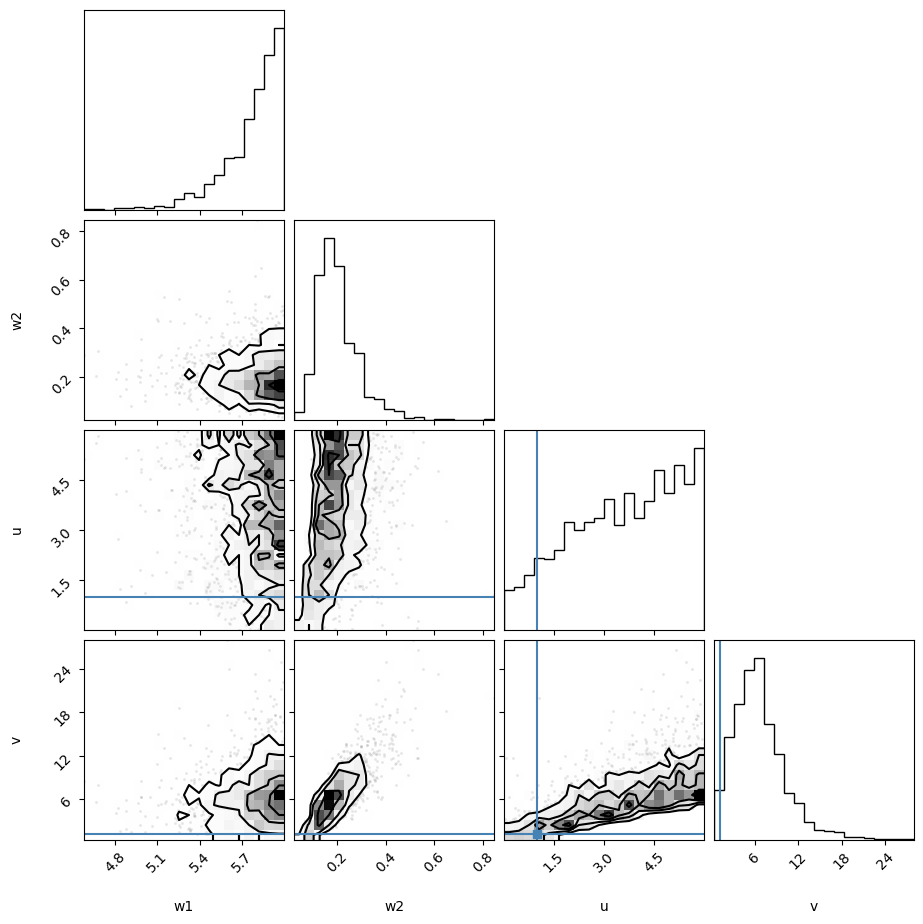

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

File created:  ./results/susman18_Model1_1_run_194002_lin_020.bin
----------------------------------------------------------


In [8]:
################### TO READ AND WRITE THE DATASET ###################
tanouchi25c_set = pd.read_csv("./dataset/Tanouchi25C.csv")
tanouchi37c_set = pd.read_csv("./dataset/Tanouchi37C.csv")
susman18_set = pd.read_csv("./dataset/Susman18_physical_units.csv")
tanouchi25c_set.df_name = "tanouchi25c"
tanouchi37c_set.df_name = "tanouchi37c"
susman18_set.df_name = "susman18"

names_to_dataset_map = {d.df_name: d for d in [tanouchi25c_set, tanouchi37c_set, susman18_set]}

df = susman18_set
WRITE_ON_FILE = True
OUTPUT = True
AUTO_FIND_P0 = False
FOLDER_PATH = "./results/"
DF_NAME = df.df_name
lineages = []
nwalkers = 25
chain_lenght = 3000
discard = 1000
thin_number = 35
model = Model1_1()
no_model = 2
run_id = get_run_id(model.__class__)


params_mapping = {Model1_1: (['length_birth'], [slice(0, -1)]),
    Model2: (['length_birth'], [slice(0, -1)]),
    Model3: (["division_ratio", "length_final", "growth_rate"],
            [slice(1, None), slice(None, -1), slice(1, None)])}

START = True
if USE_DATASET and START:

    columns = ["growth_rate"]
    df, df_deleted = filter_data(df, filter_cols=columns, show=False, remove_lineages=True)
    print(f"Eliminated {len(df_deleted)} rows")

    if model.__class__ == Model3:
        a = 104.197
        b = 0.007
        c = 53.654
        d = 64.138
        w2 = 1.832
        u = 0.928
        v = 2.461

        if AUTO_FIND_P0:
            truths = find_initial_params(df, model = no_model)
        else:
            truths = [a, b, c, d, w2, u, v]
    elif model.__class__ == Model1_1:
        w1, w2, u, v = 1.2, 1.4, 1, 1.2

        if AUTO_FIND_P0:
            truths = find_initial_params(df, model = no_model)
        else:
            truths = [w1, w2, u, v]
    else:
        raise ValueError("Specify the truth for this model")

    labels = model.fix_params_label

    ndim = len(truths)
    guess = np.array(truths) + 1e-5 * np.random.randn(nwalkers, ndim)

    if not lineages:
        lineages = list(df['lineage_ID'].unique().astype(int))

    df = df[df["lineage_ID"].isin(lineages)]

    with open(FOLDER_PATH + f"run_{run_id}.txt", "w") as f:
        f.write(inspect.getsource(model.log_prior))

    print(f"######## ANALYZING DATASET {DF_NAME}, RUN_ID: {run_id} ########")
    print("Initial Parameters:")
    print(" ".join([f"{l}={v:.3f}" for v, l in zip(truths, labels)]))
    print("")

    for (lin_id,), df_lin in df.groupby(["lineage_ID"]):
        print(f"DATASET {DF_NAME}, LINEAGE: {lin_id}, n data: {len(df_lin)}")

        spans = df_lin["generationtime"][1:].to_numpy()
        params_list = []
        for param, slic in zip(*params_mapping[model.__class__]):
            params_list.append(df_lin[param][slic].to_numpy())

        title = f"{DF_NAME}  run_id: {run_id}  lineage: {lin_id}"
        result = emcee_analysis(nwalkers=nwalkers, truths=truths, log_prob_fn=model.log_prob,
                                args=(spans, *params_list), guess=guess, chain_lenght=chain_lenght,
                                labels=labels, use_pool=True, discard=discard, thinning=thin_number,
                                plot=OUTPUT)
        samples, flat_samples, result_dict = result

        if WRITE_ON_FILE:
            data = {"n_walkers": nwalkers, "ndim": ndim, "dataset": DF_NAME, "lineage_id": lin_id,
                    "truths": truths, "initial_guess": guess, "labels": labels,
                    # "spans": spans, "alphas": alphas, "kappas": kappas, "m_finals": m_finals,
                    "samples": samples, "tau": None, "thin_number": thin_number, "discard": discard,
                    "flat_samples": flat_samples, "result_dict": result_dict, "data_length": len(df_lin),
                    "data": [spans, *params_list],
                    "run_id": run_id
                    }

            filename = f"{DF_NAME}_{model.__class__.__name__}_run_{run_id:06}_lin_{int(lin_id):03}.bin"
            Path(FOLDER_PATH).mkdir(parents=True, exist_ok=True)


            with open(FOLDER_PATH + filename, "wb") as f:
                pickle.dump(data, f)

            print("File created: ", FOLDER_PATH + filename)
            print("----------------------------------------------------------")

LEN 62


Text(0.5, 1.0, 'u / v')

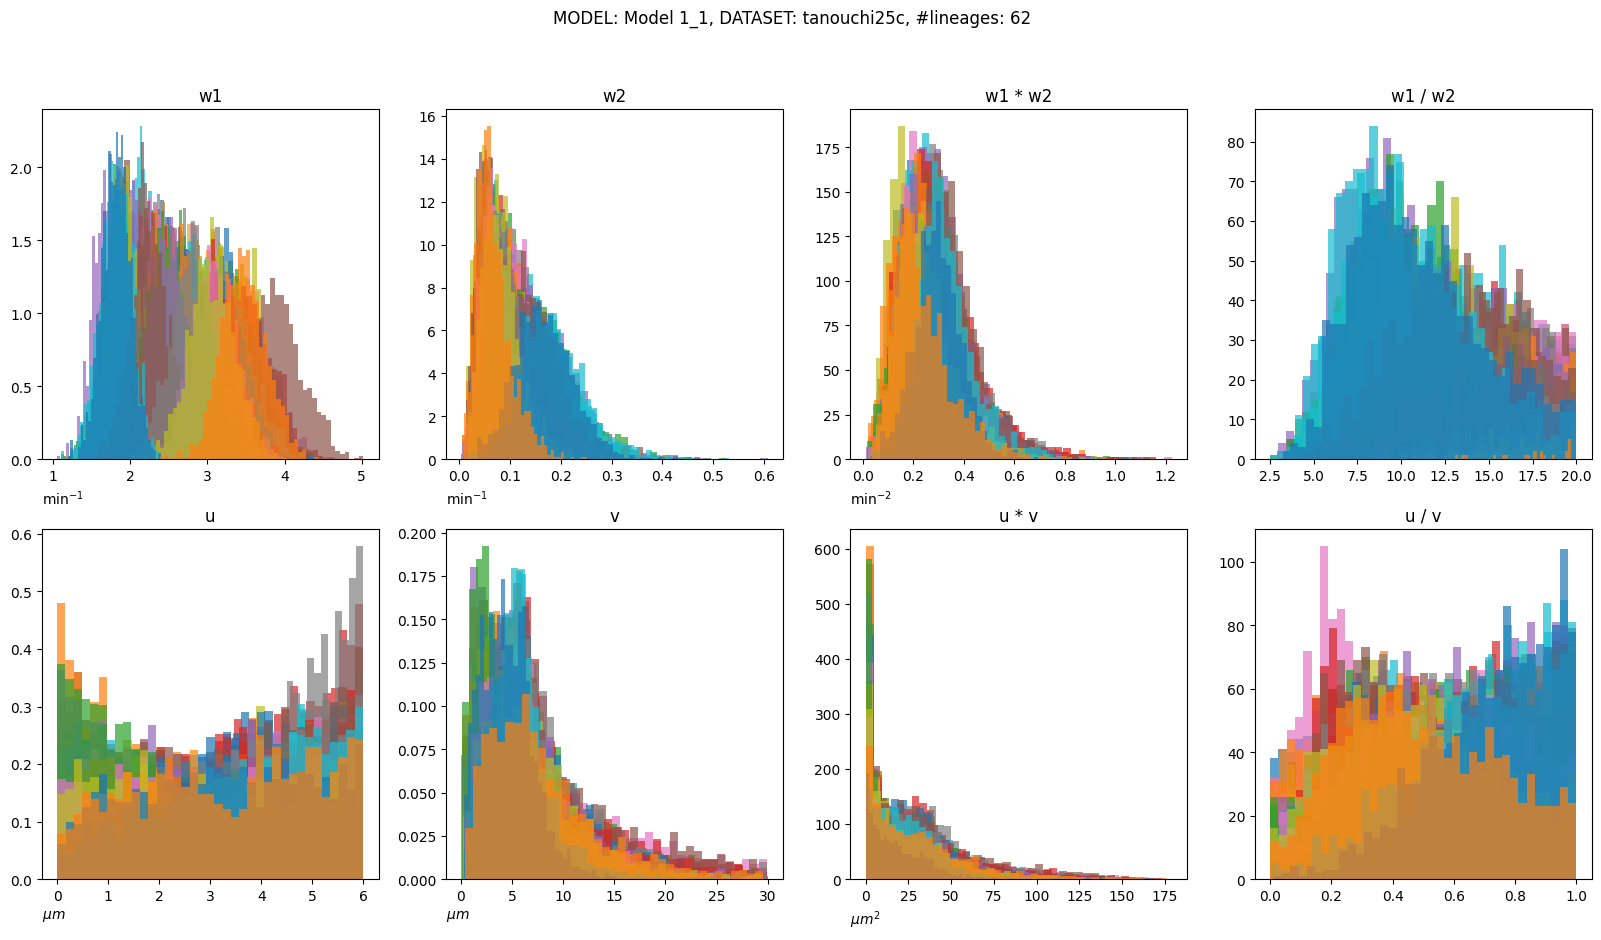

In [7]:
########### READ BACK THE FILE CREATED ########################
FOLDER_PATH = "./results/"
RUN_ID = "156804"
model_name = 'Model 1_1'

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# lineages = [6, 12]
# dataset_results_dict = read_files(FOLDER_PATH, df_name="tanouchi37c", run_id=RUN_ID, lineages=lineages)

# for _, data in dataset_results_dict.items():
#     df_name, lin_id = data["dataset"], data["lineage_id"]
#     labels, samples, flat_samples = data["labels"], data["samples"], data["flat_samples"]
#     result_dict, truths = data["result_dict"], data["truths"]

#     title = f"DATASET {df_name}, lineage {lin_id}"

#     print(title)
#     plot_chains(samples, title=title, labels=labels)
#     fig = corner.corner(flat_samples, labels=labels, truths=truths)
#     fig.suptitle(title)
#     plt.show()
#     print_latex_result(list(result_dict.values()), labels)
#     print("-------------------------------")
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


lineages = []
dataset_results_dict = read_files(FOLDER_PATH, df_name="tanouchi25", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 2, 4
fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 5))

for i, data in enumerate(dataset_results_dict.values()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    labels, flat_samples = data["labels"], data["flat_samples"]
    result_dict, truths = data["result_dict"], data["truths"]

    # recall parameter order = a, b, c, d, w2, u, v

    # for j in range(flat_samples.shape[1]):
    #     nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    #     index = (j // COLS, j % COLS)
    #     if (index == (0,2) or index == (1,0)): continue
    #     axs[index].hist(flat_samples[:, j], alpha=0.7, bins=nbins, label=f"Lin {lin_id}", density=True)

    nbins = int(np.sqrt(flat_samples.shape[0]))

    axs[0, 0].hist(flat_samples[:, 0], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    axs[0, 1].hist(flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot w1 * w2
    axs[0, 2].hist(flat_samples[:, 0] * flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot w1 / w2
    ratio_samples = flat_samples[:, 0] / flat_samples[:, 1]
    ratio_samples = ratio_samples[ratio_samples < 20]
    axs[0, 3].hist(ratio_samples, label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    axs[1, 0].hist(flat_samples[:, 2], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)

    axs[1, 1].hist(flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot u * v
    axs[1, 2].hist(flat_samples[:, 2] * flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot u / v
    axs[1, 3].hist(flat_samples[:, 2] / flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    

for j, label in enumerate(labels):
    nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    index = (j // COLS, j % COLS)
    axs[index].set_title(label)

fig.suptitle(f"MODEL: {model_name}, DATASET: {df_name}, #lineages: {len(dataset_results_dict)}")
axs[0, 0].set_title('w1')
axs[0, 0].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 1].set_title('w2')
axs[0, 1].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 2].set_title('w1 * w2')
axs[0, 2].set_xlabel('min$^{-2}$', loc = 'left')
axs[0, 3].set_title('w1 / w2')
axs[1, 0].set_title('u')
axs[1, 0].set_xlabel('$\mu m$', loc = 'left')
axs[1, 1].set_title('v')
axs[1, 1].set_xlabel('$\mu m$', loc = 'left')
axs[1, 2].set_title('u * v')
axs[1, 2].set_xlabel('$\mu m^2$', loc = 'left')
axs[1, 3].set_title('u / v')

Compatible file:  tanouchi25c  lineage:  12.0


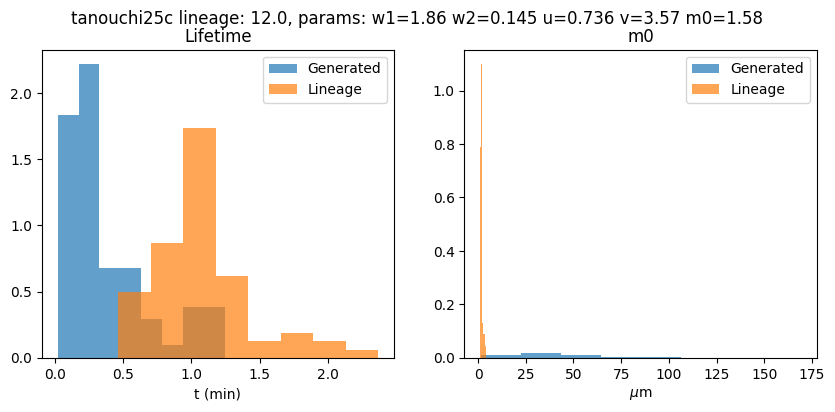

In [10]:
FOLDER_PATH = "./results/"
RUN_ID = "156804"
lineages = [12]
dataset_results_dict = read_files(FOLDER_PATH, df_name="tan", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 1, 2

for i, (_, data) in enumerate(dataset_results_dict.items()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    # if int(lin_id) not in [1, 2, 3] or not df_name.startswith("tan"):
    #     continue

    print("Compatible file: ", df_name, " lineage: ", lin_id)
    labels, flat_samples = data["labels"], data["flat_samples"]
    results, truths = data["result_dict"], data["truths"]
    data_length = data["data_length"]
    spans = data["data"][0]
    m0 = data['data'][1]

    params = {'m0':m0[0], 'w1':results['w1'][0], "w2":results["w2"][0], "u":results["u"][0], "v":results["v"][0]}
    model_test = Model1_1(**params)
    params_txt = model_test.get_params_str()

    evolver_test = Evolver(model_test)
    evolver_test.evolve(n_div=data_length)

    fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 4))

    model_data = [evolver_test.spans]
    for i in range(evolver_test.params.shape[1]): # the order is defined in the __init__ method of the model
        model_data.append(evolver_test.params[:, i])
    
    params_labels = ["Lifetime"] + model_test.var_params_label
    for j, value in enumerate(data["data"]):
        nbins = int(np.sqrt(len(model_data[j])))

        # index = (j // COLS, j % COLS)
        index = j
        axs[index].hist(model_data[j], label="Generated", density=True, alpha=0.7, bins=nbins)
        axs[index].hist(value, label="Lineage", density=True, alpha=0.7, bins=nbins)
        axs[index].set_title(params_labels[j])
        if index == 0:
            axs[index].set_xlabel('t (min)')
        elif index == 1:
            axs[index].set_xlabel('$\mu$m')
        axs[index].legend()
    
    fig.suptitle(f"{df_name} lineage: {lin_id}, params: {params_txt}", wrap=True)

Text(0.5, 1.0, 'u / v')

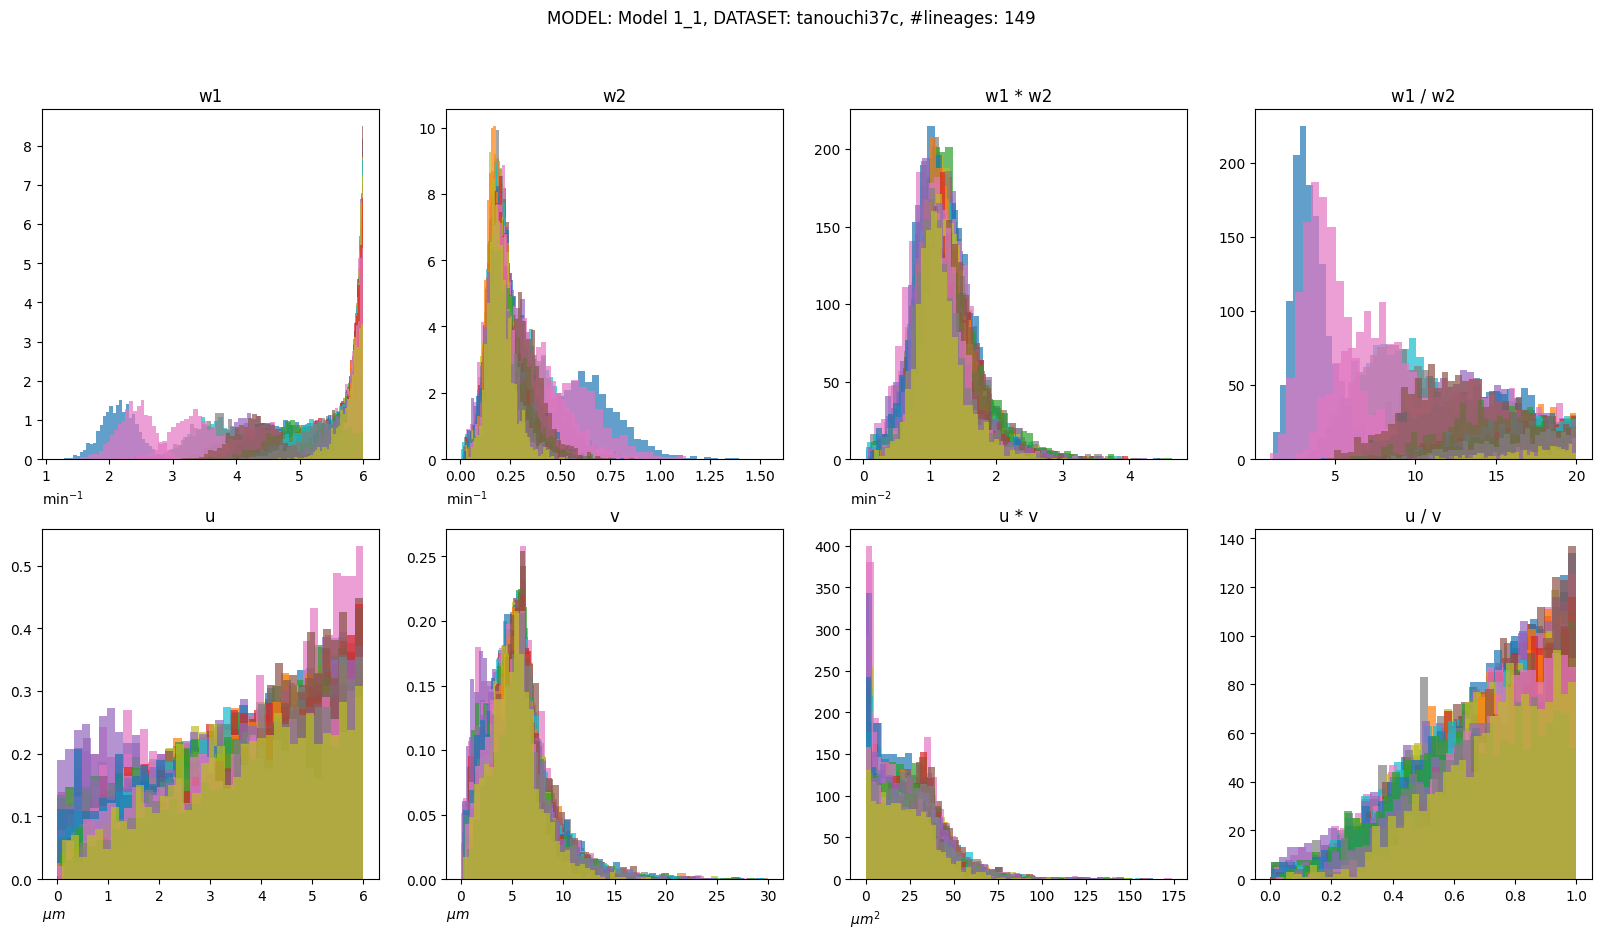

In [3]:
########### READ BACK THE FILE CREATED ########################
FOLDER_PATH = "./results/"
RUN_ID = "374320"
model_name = 'Model 1_1'

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# lineages = [6, 12]
# dataset_results_dict = read_files(FOLDER_PATH, df_name="tanouchi37c", run_id=RUN_ID, lineages=lineages)

# for _, data in dataset_results_dict.items():
#     df_name, lin_id = data["dataset"], data["lineage_id"]
#     labels, samples, flat_samples = data["labels"], data["samples"], data["flat_samples"]
#     result_dict, truths = data["result_dict"], data["truths"]

#     title = f"DATASET {df_name}, lineage {lin_id}"

#     print(title)
#     plot_chains(samples, title=title, labels=labels)
#     fig = corner.corner(flat_samples, labels=labels, truths=truths)
#     fig.suptitle(title)
#     plt.show()
#     print_latex_result(list(result_dict.values()), labels)
#     print("-------------------------------")
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


lineages = []
dataset_results_dict = read_files(FOLDER_PATH, df_name="tanouchi37c", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 2, 4
fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 5))

for i, data in enumerate(dataset_results_dict.values()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    labels, flat_samples = data["labels"], data["flat_samples"]
    result_dict, truths = data["result_dict"], data["truths"]

    # recall parameter order = a, b, c, d, w2, u, v

    # for j in range(flat_samples.shape[1]):
    #     nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    #     index = (j // COLS, j % COLS)
    #     if (index == (0,2) or index == (1,0)): continue
    #     axs[index].hist(flat_samples[:, j], alpha=0.7, bins=nbins, label=f"Lin {lin_id}", density=True)

    nbins = int(np.sqrt(flat_samples.shape[0]))

    axs[0, 0].hist(flat_samples[:, 0], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    axs[0, 1].hist(flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot w1 * w2
    axs[0, 2].hist(flat_samples[:, 0] * flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot w1 / w2
    ratio_samples = flat_samples[:, 0] / flat_samples[:, 1]
    ratio_samples = ratio_samples[ratio_samples < 20]
    axs[0, 3].hist(ratio_samples, label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    axs[1, 0].hist(flat_samples[:, 2], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)

    axs[1, 1].hist(flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot u * v
    axs[1, 2].hist(flat_samples[:, 2] * flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot u / v
    axs[1, 3].hist(flat_samples[:, 2] / flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    

for j, label in enumerate(labels):
    nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    index = (j // COLS, j % COLS)
    axs[index].set_title(label)

fig.suptitle(f"MODEL: {model_name}, DATASET: {df_name}, #lineages: {len(dataset_results_dict)}")
axs[0, 0].set_title('w1')
axs[0, 0].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 1].set_title('w2')
axs[0, 1].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 2].set_title('w1 * w2')
axs[0, 2].set_xlabel('min$^{-2}$', loc = 'left')
axs[0, 3].set_title('w1 / w2')
axs[1, 0].set_title('u')
axs[1, 0].set_xlabel('$\mu m$', loc = 'left')
axs[1, 1].set_title('v')
axs[1, 1].set_xlabel('$\mu m$', loc = 'left')
axs[1, 2].set_title('u * v')
axs[1, 2].set_xlabel('$\mu m^2$', loc = 'left')
axs[1, 3].set_title('u / v')

Compatible file:  tanouchi37c  lineage:  12.0


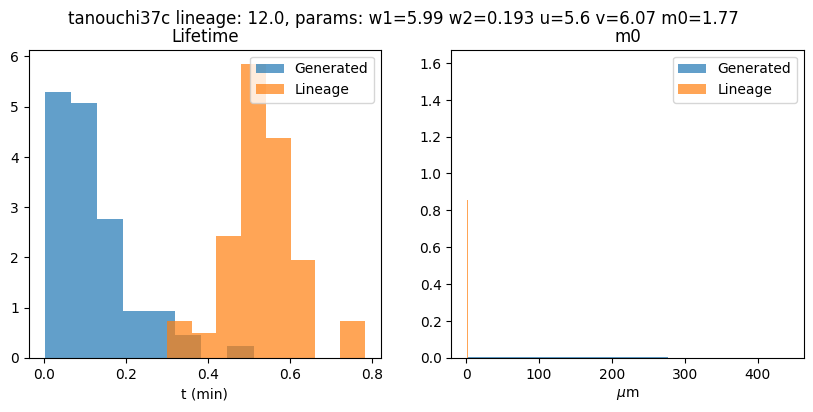

In [11]:
FOLDER_PATH = "./results/"
RUN_ID = "374320"
lineages = [12]
dataset_results_dict = read_files(FOLDER_PATH, df_name="tan", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 1, 2

for i, (_, data) in enumerate(dataset_results_dict.items()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    # if int(lin_id) not in [1, 2, 3] or not df_name.startswith("tan"):
    #     continue

    print("Compatible file: ", df_name, " lineage: ", lin_id)
    labels, flat_samples = data["labels"], data["flat_samples"]
    results, truths = data["result_dict"], data["truths"]
    data_length = data["data_length"]
    spans = data["data"][0]
    m0 = data['data'][1]

    params = {'m0':m0[0], 'w1':results['w1'][0], "w2":results["w2"][0], "u":results["u"][0], "v":results["v"][0]}
    model_test = Model1_1(**params)
    params_txt = model_test.get_params_str()

    evolver_test = Evolver(model_test)
    evolver_test.evolve(n_div=data_length)

    fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 4))

    model_data = [evolver_test.spans]
    for i in range(evolver_test.params.shape[1]): # the order is defined in the __init__ method of the model
        model_data.append(evolver_test.params[:, i])
    
    params_labels = ["Lifetime"] + model_test.var_params_label
    for j, value in enumerate(data["data"]):
        nbins = int(np.sqrt(len(model_data[j])))

        # index = (j // COLS, j % COLS)
        index = j
        axs[index].hist(model_data[j], label="Generated", density=True, alpha=0.7, bins=nbins)
        axs[index].hist(value, label="Lineage", density=True, alpha=0.7, bins=nbins)
        axs[index].set_title(params_labels[j])
        if index == 0:
            axs[index].set_xlabel('t (min)')
        elif index == 1:
            axs[index].set_xlabel('$\mu$m')
        axs[index].legend()
    
    fig.suptitle(f"{df_name} lineage: {lin_id}, params: {params_txt}", wrap=True)

Text(0.5, 1.0, 'u / v')

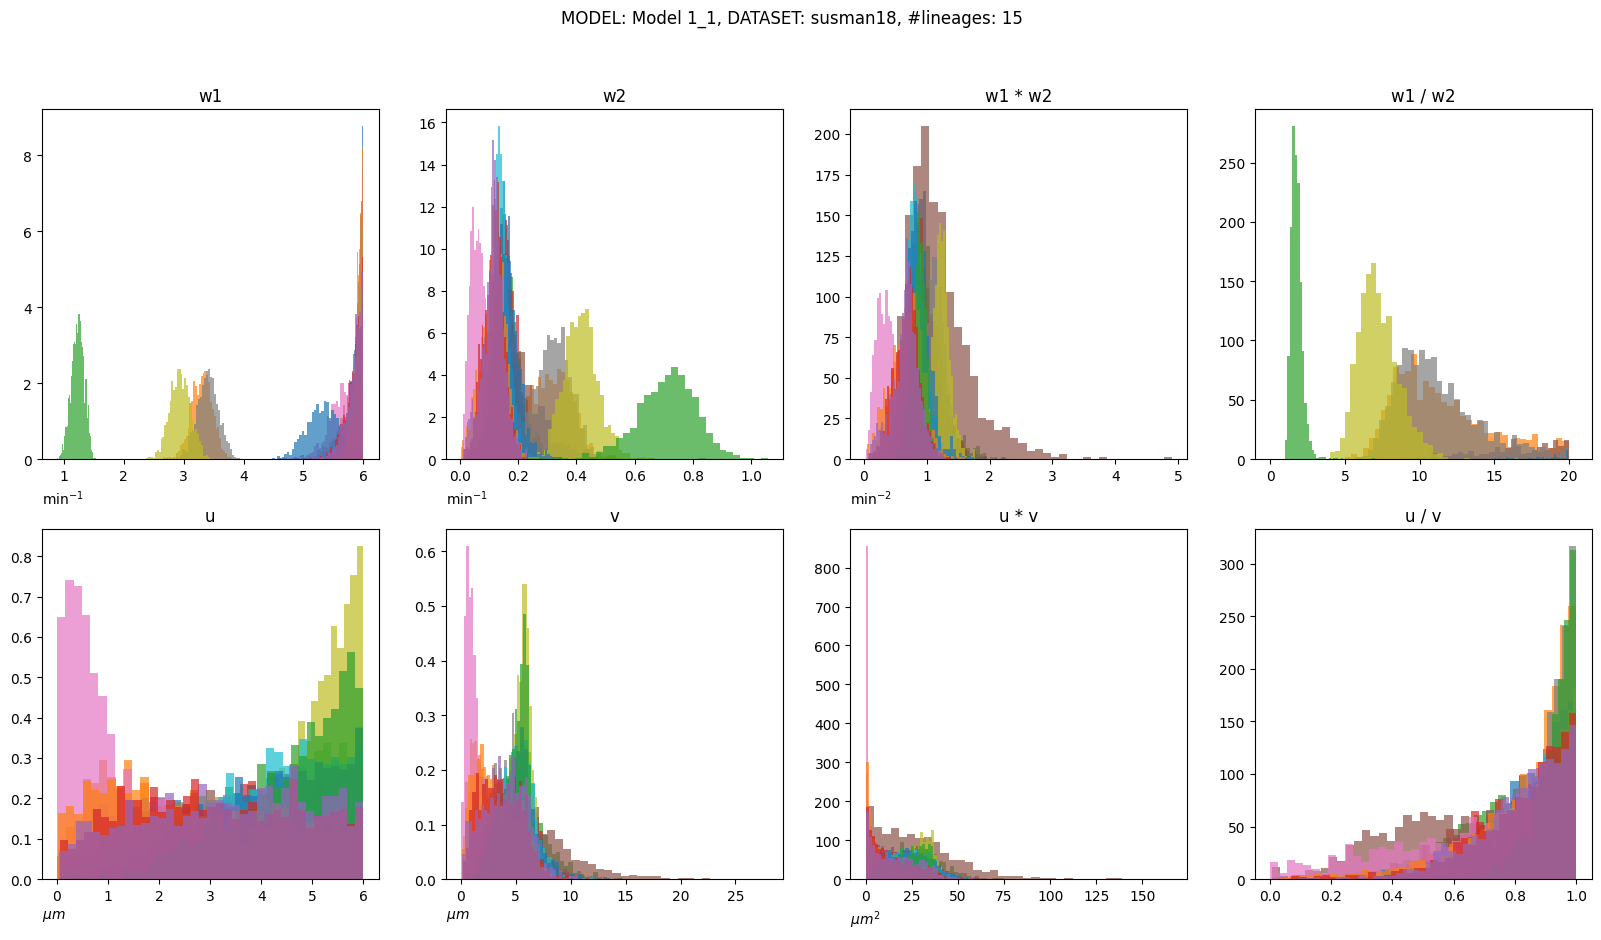

In [2]:
########### READ BACK THE FILE CREATED ########################
FOLDER_PATH = "./results/"
RUN_ID = "194002"
model_name = 'Model 1_1'

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# lineages = [6, 12]
# dataset_results_dict = read_files(FOLDER_PATH, df_name="tanouchi37c", run_id=RUN_ID, lineages=lineages)

# for _, data in dataset_results_dict.items():
#     df_name, lin_id = data["dataset"], data["lineage_id"]
#     labels, samples, flat_samples = data["labels"], data["samples"], data["flat_samples"]
#     result_dict, truths = data["result_dict"], data["truths"]

#     title = f"DATASET {df_name}, lineage {lin_id}"

#     print(title)
#     plot_chains(samples, title=title, labels=labels)
#     fig = corner.corner(flat_samples, labels=labels, truths=truths)
#     fig.suptitle(title)
#     plt.show()
#     print_latex_result(list(result_dict.values()), labels)
#     print("-------------------------------")
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


lineages = []
dataset_results_dict = read_files(FOLDER_PATH, df_name="susman18", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 2, 4
fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 5))

for i, data in enumerate(dataset_results_dict.values()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    labels, flat_samples = data["labels"], data["flat_samples"]
    result_dict, truths = data["result_dict"], data["truths"]

    # recall parameter order = a, b, c, d, w2, u, v

    # for j in range(flat_samples.shape[1]):
    #     nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    #     index = (j // COLS, j % COLS)
    #     if (index == (0,2) or index == (1,0)): continue
    #     axs[index].hist(flat_samples[:, j], alpha=0.7, bins=nbins, label=f"Lin {lin_id}", density=True)

    nbins = int(np.sqrt(flat_samples.shape[0]))

    axs[0, 0].hist(flat_samples[:, 0], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    axs[0, 1].hist(flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot w1 * w2
    axs[0, 2].hist(flat_samples[:, 0] * flat_samples[:, 1], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot w1 / w2
    ratio_samples = flat_samples[:, 0] / flat_samples[:, 1]
    ratio_samples = ratio_samples[ratio_samples < 20]
    axs[0, 3].hist(ratio_samples, label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    axs[1, 0].hist(flat_samples[:, 2], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)

    axs[1, 1].hist(flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins, density=True)
    
    # plot u * v
    axs[1, 2].hist(flat_samples[:, 2] * flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    
    # plot u / v
    axs[1, 3].hist(flat_samples[:, 2] / flat_samples[:, 3], label=f"Lin {lin_id}", alpha=0.7,
            bins=nbins)
    

for j, label in enumerate(labels):
    nbins = int(np.sqrt(flat_samples[:, j].shape[0]))
    index = (j // COLS, j % COLS)
    axs[index].set_title(label)

fig.suptitle(f"MODEL: {model_name}, DATASET: {df_name}, #lineages: {len(dataset_results_dict)}")
axs[0, 0].set_title('w1')
axs[0, 0].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 1].set_title('w2')
axs[0, 1].set_xlabel('min$^{-1}$', loc = 'left')
axs[0, 2].set_title('w1 * w2')
axs[0, 2].set_xlabel('min$^{-2}$', loc = 'left')
axs[0, 3].set_title('w1 / w2')
axs[1, 0].set_title('u')
axs[1, 0].set_xlabel('$\mu m$', loc = 'left')
axs[1, 1].set_title('v')
axs[1, 1].set_xlabel('$\mu m$', loc = 'left')
axs[1, 2].set_title('u * v')
axs[1, 2].set_xlabel('$\mu m^2$', loc = 'left')
axs[1, 3].set_title('u / v')

In [14]:
FOLDER_PATH = "./results/"
RUN_ID = "194002"
lineages = [12]
dataset_results_dict = read_files(FOLDER_PATH, df_name="ssusman18", run_id=RUN_ID,lineages=lineages)

ROWS, COLS = 1, 2

for i, (_, data) in enumerate(dataset_results_dict.items()):
    df_name, lin_id = data["dataset"], data["lineage_id"]
    # if int(lin_id) not in [1, 2, 3] or not df_name.startswith("tan"):
    #     continue

    print("Compatible file: ", df_name, " lineage: ", lin_id)
    labels, flat_samples = data["labels"], data["flat_samples"]
    results, truths = data["result_dict"], data["truths"]
    data_length = data["data_length"]
    spans = data["data"][0]
    m0 = data['data'][1]

    params = {'m0':m0[0], 'w1':results['w1'][0], "w2":results["w2"][0], "u":results["u"][0], "v":results["v"][0]}
    model_test = Model1_1(**params)
    params_txt = model_test.get_params_str()

    evolver_test = Evolver(model_test)
    evolver_test.evolve(n_div=data_length)

    fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 5, ROWS * 4))

    model_data = [evolver_test.spans]
    for i in range(evolver_test.params.shape[1]): # the order is defined in the __init__ method of the model
        model_data.append(evolver_test.params[:, i])
    
    params_labels = ["Lifetime"] + model_test.var_params_label
    for j, value in enumerate(data["data"]):
        nbins = int(np.sqrt(len(model_data[j])))

        # index = (j // COLS, j % COLS)
        index = j
        axs[index].hist(model_data[j], label="Generated", density=True, alpha=0.7, bins=nbins)
        axs[index].hist(value, label="Lineage", density=True, alpha=0.7, bins=nbins)
        axs[index].set_title(params_labels[j])
        if index == 0:
            axs[index].set_xlabel('t (min)')
        elif index == 1:
            axs[index].set_xlabel('$\mu$m')
        axs[index].legend()
    
    fig.suptitle(f"{df_name} lineage: {lin_id}, params: {params_txt}", wrap=True)